In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

# generate a daily signal covering one year 2016 in a pandas dataframe
N = 360
df_train = pd.DataFrame({"Date" : pd.date_range(start="2016-01-25", periods=N, freq='D'),
                         "Signal_inc" : (np.arange(N)//40 +  np.arange(N) % 21 + np.random.randn(N)),
                         "Signal_dec" : -(np.arange(N)//40 +  np.arange(N) % 21 + np.random.randn(N))
                        })
min1 , min2 = df_train['Signal_inc'].min(), df_train['Signal_dec'].min()
max1 , max2 = df_train['Signal_inc'].max(), df_train['Signal_dec'].max()
df_train['Signal_mean'] = (df_train['Signal_inc'] + df_train['Signal_dec']) / 2
df_train['Signal_prod'] = (df_train['Signal_inc'] - min1) / (max1 - min1) * (df_train['Signal_dec'] - min2) / (max2 - min2)

In [2]:
df_train.head(12)

Date  Signal_inc  Signal_dec  Signal_mean  Signal_prod
0  2016-01-25   -1.108085   -1.095771    -1.101928     0.000000
1  2016-01-26    0.264362   -0.160802     0.051780     0.046125
2  2016-01-27    2.529631   -2.034935     0.247348     0.114431
3  2016-01-28    4.479361   -1.171642     1.653859     0.181299
4  2016-01-29    2.716653   -3.046437    -0.164892     0.115875
5  2016-01-30    4.376675   -6.131422    -0.877374     0.146749
6  2016-01-31    6.289383   -4.687415     0.800984     0.210183
7  2016-02-01    7.854573   -9.275737    -0.710582     0.207462
8  2016-02-02    8.741852   -6.882918     0.929467     0.255048
9  2016-02-03    8.281206   -9.405266    -0.562030     0.215942
10 2016-02-04   10.074926   -9.610904     0.232011     0.254556
11 2016-02-05   10.079201  -10.288586    -0.104692     0.245953

In [3]:
df_train.tail(12)

Date  Signal_inc  Signal_dec  Signal_mean  Signal_prod
348 2017-01-07   19.731350  -21.353003    -0.810826     0.193547
349 2017-01-08   21.063986  -21.152923    -0.044468     0.211015
350 2017-01-09   21.465496  -20.632612     0.416442     0.228315
351 2017-01-10   23.450873  -22.439886     0.505494     0.197460
352 2017-01-11   23.878666  -23.161825     0.358420     0.180198
353 2017-01-12   26.019751  -24.145047     0.937352     0.165029
354 2017-01-13   26.795232  -26.318751     0.238241     0.100141
355 2017-01-14   27.827888  -26.814140     0.506874     0.087397
356 2017-01-15   28.015598  -28.723434    -0.353918     0.024151
357 2017-01-16    9.215699   -8.447968     0.383865     0.248775
358 2017-01-17    8.890304   -7.995395     0.447454     0.246127
359 2017-01-18   10.193646   -9.389073     0.402287     0.260135

<AxesSubplot:xlabel='Date'>

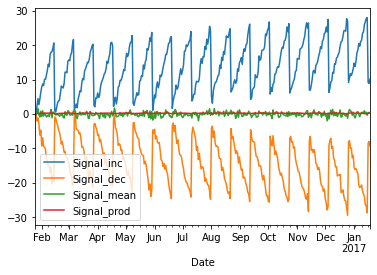

In [4]:
df_train.plot('Date' , ['Signal_inc', 'Signal_dec', 'Signal_mean', 'Signal_prod'])

In [ ]:

import pyaf.ForecastEngine as autof
# create a forecast engine. This is the main object handling all the operations
lEngine = autof.cForecastEngine()
lEngine.mOptions.enable_slow_mode()
# get the best time series model for predicting one week
lEngine.train(iInputDS = df_train, iTime = 'Date', iSignal = ['Signal_dec' , 'Signal_inc', 'Signal_mean', 'Signal_prod'], iHorizon = 7);
lEngine.getModelInfo() # => relative error 7% (MAPE)


INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['Signal_dec', 'Signal_inc', 'Signal_mean', 'Signal_prod'], 'Transformations': [('Signal_dec', 'None', '_', 'T+S+R'), ('Signal_dec', 'None', '_', 'TS+R'), ('Signal_dec', 'None', '_', 'TSR'), ('Signal_dec', 'None', 'Diff_', 'T+S+R'), ('Signal_dec', 'None', 'Diff_', 'TS+R'), ('Signal_dec', 'None', 'Diff_', 'TSR'), ('Signal_dec', 'None', 'RelDiff_', 'T+S+R'), ('Signal_dec', 'None', 'RelDiff_', 'TS+R'), ('Signal_dec', 'None', 'RelDiff_', 'TSR'), ('Signal_dec', 'None', 'CumSum_', 'T+S+R'), ('Signal_dec', 'None', 'CumSum_', 'TS+R'), ('Signal_dec', 'None', 'CumSum_', 'TSR'), ('Signal_dec', 'None', 'Box_Cox_-2.0_', 'T+S+R'), ('Signal_dec', 'None', 'Box_Cox_-2.0_', 'TS+R'), ('Signal_dec', 'None', 'Box_Cox_-2.0_', 'TSR'), ('Signal_dec', 'None', 'Box_Cox_-1.0_', 'T+S+R'), ('Signal_dec', 'None', 'Box_Cox_-1.0_', 'TS+R'), ('Signal_dec', 'None', 'Box_Cox_-1.0_', 'TSR'), ('Signal_dec', 'None', 'Box_Cox_0.0_', 'T+S+R'), ('Signal_dec'

INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_dec', 'Transformation': 'Diff_Signal_dec'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_dec', 'Transformation': 'Diff_Signal_dec'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_dec', 'Transformation': 'Diff_Signal_dec'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_dec', 'Transformation': 'RelDiff_Signal_dec'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_dec', 'Transformation': 'RelDiff_Signal_dec'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_dec', 'Transformation': 'RelDiff_Signal_dec'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_dec', 'Transformation': 'CumSum_Signal_dec'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_dec', 'Transformation': 'CumSum_Signal_dec'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_dec', 

INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_inc', 'Transformation': '_Signal_inc'}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 136.09, ('TRAINING', {'Signal': 'Signal_dec', 'Transformation': 'Logit_Signal_dec'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_inc', 'Transformation': '_Signal_inc'}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 134.082, ('TRAINING', {'Signal': 'Signal_dec', 'Transformation': 'Fisher_Signal_dec'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_inc', 'Transformation': '_Signal_inc'}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 136.866, ('TRAINING', {'Signal': 'Signal_dec', 'Transformation': 'Fisher_Signal_dec'}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 128.112, ('TRAINING', {'Signal': 'Signal_dec', 'Transformation': 'Anscombe_Signal_dec'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_inc', 'Transformation': 'Diff_Signal_inc'}))
INFO:pyaf.timing:('OPERATION_STA

INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_inc', 'Transformation': 'Logit_Signal_inc'}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 120.556, ('TRAINING', {'Signal': 'Signal_inc', 'Transformation': 'Quantized_5_Signal_inc'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_inc', 'Transformation': 'Logit_Signal_inc'}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 136.794, ('TRAINING', {'Signal': 'Signal_inc', 'Transformation': 'Quantized_10_Signal_inc'}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 135.433, ('TRAINING', {'Signal': 'Signal_inc', 'Transformation': 'Quantized_10_Signal_inc'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_inc', 'Transformation': 'Logit_Signal_inc'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_inc', 'Transformation': 'Fisher_Signal_inc'}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 133.476, ('TRAINING', {'Signal': 'Signal_inc', 'Transformation': 'Quantized_10_Signal_

INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_mean', 'Transformation': 'Box_Cox_2.0_Signal_mean'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_mean', 'Transformation': 'Quantized_5_Signal_mean'}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 127.565, ('TRAINING', {'Signal': 'Signal_mean', 'Transformation': 'Box_Cox_-1.0_Signal_mean'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_mean', 'Transformation': 'Quantized_5_Signal_mean'}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 139.751, ('TRAINING', {'Signal': 'Signal_mean', 'Transformation': 'Box_Cox_-1.0_Signal_mean'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_mean', 'Transformation': 'Quantized_5_Signal_mean'}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 94.641, ('TRAINING', {'Signal': 'Signal_mean', 'Transformation': 'Box_Cox_0.0_Signal_mean'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal_mean', 'Transformation':

INFO:pyaf.timing:('OPERATION_START', ('PLOTTING', {'Signals': ['Signal_dec', 'Signal_inc', 'Signal_mean', 'Signal_prod']}))
/home/antoine/dev/python/packages/timeseries/pyaf/pyaf/TS/Plots.py:172: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(horizon, 1, figsize=(12, 12), squeeze = True)
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 6.296, ('PLOTTING', {'Signals': ['Signal_dec', 'Signal_inc', 'Signal_mean', 'Signal_prod']}))


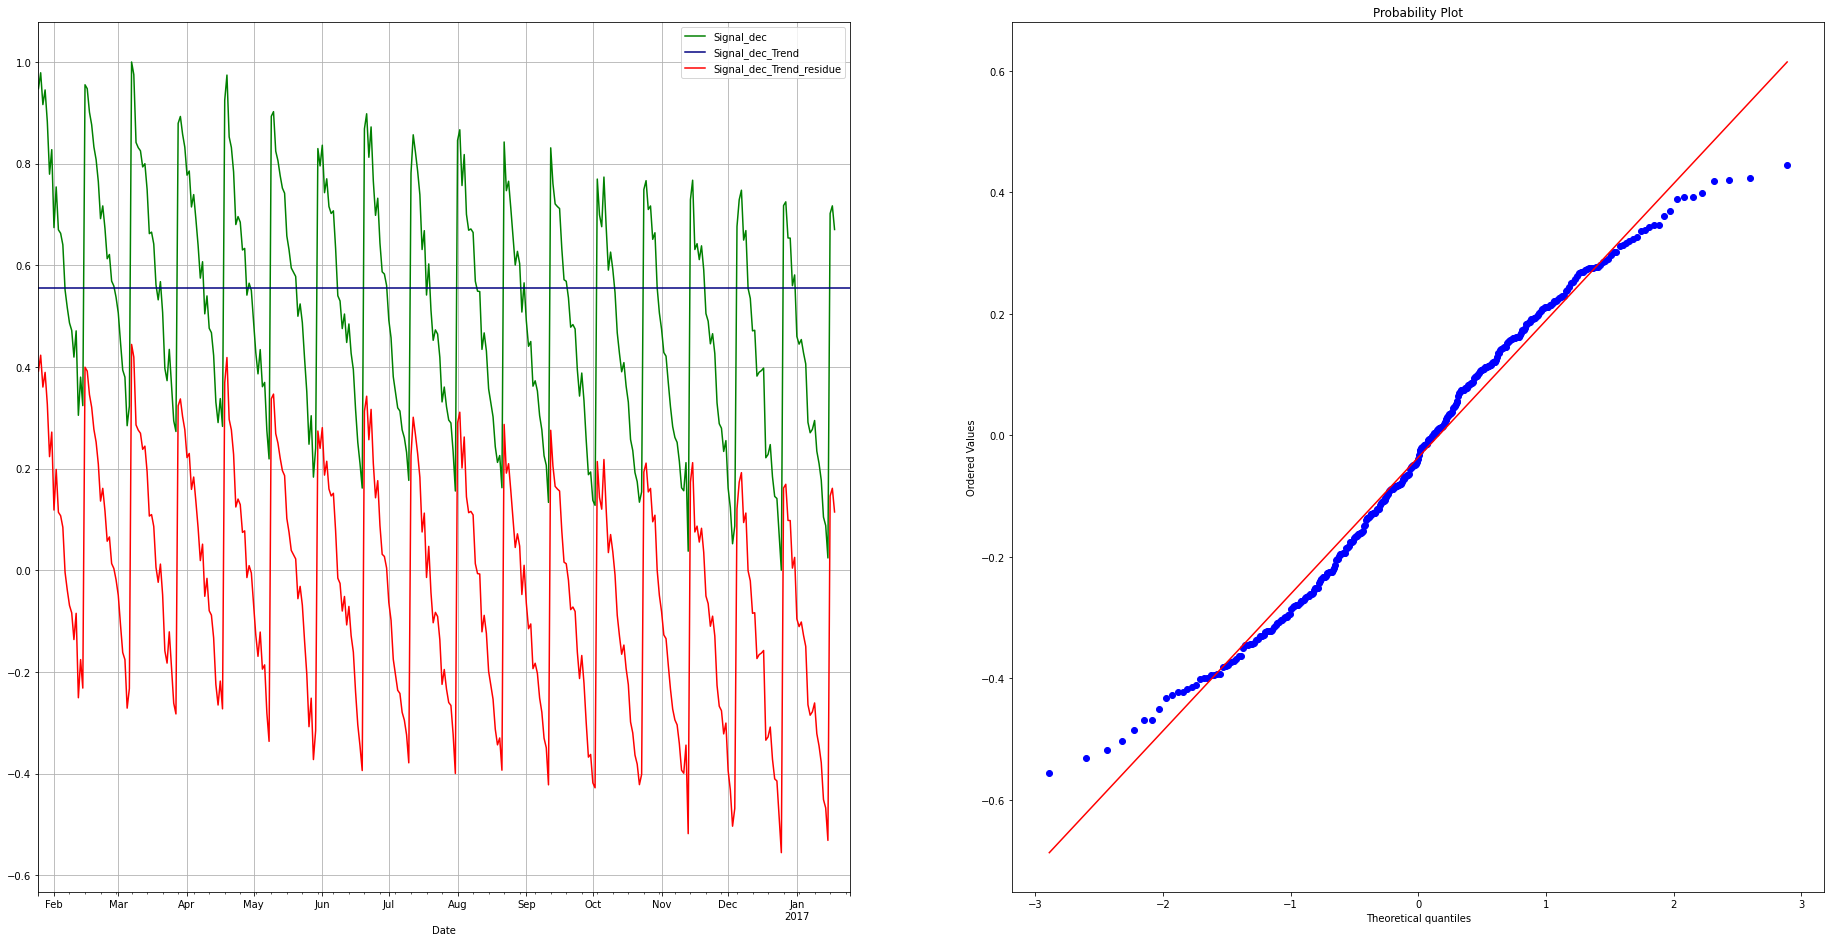

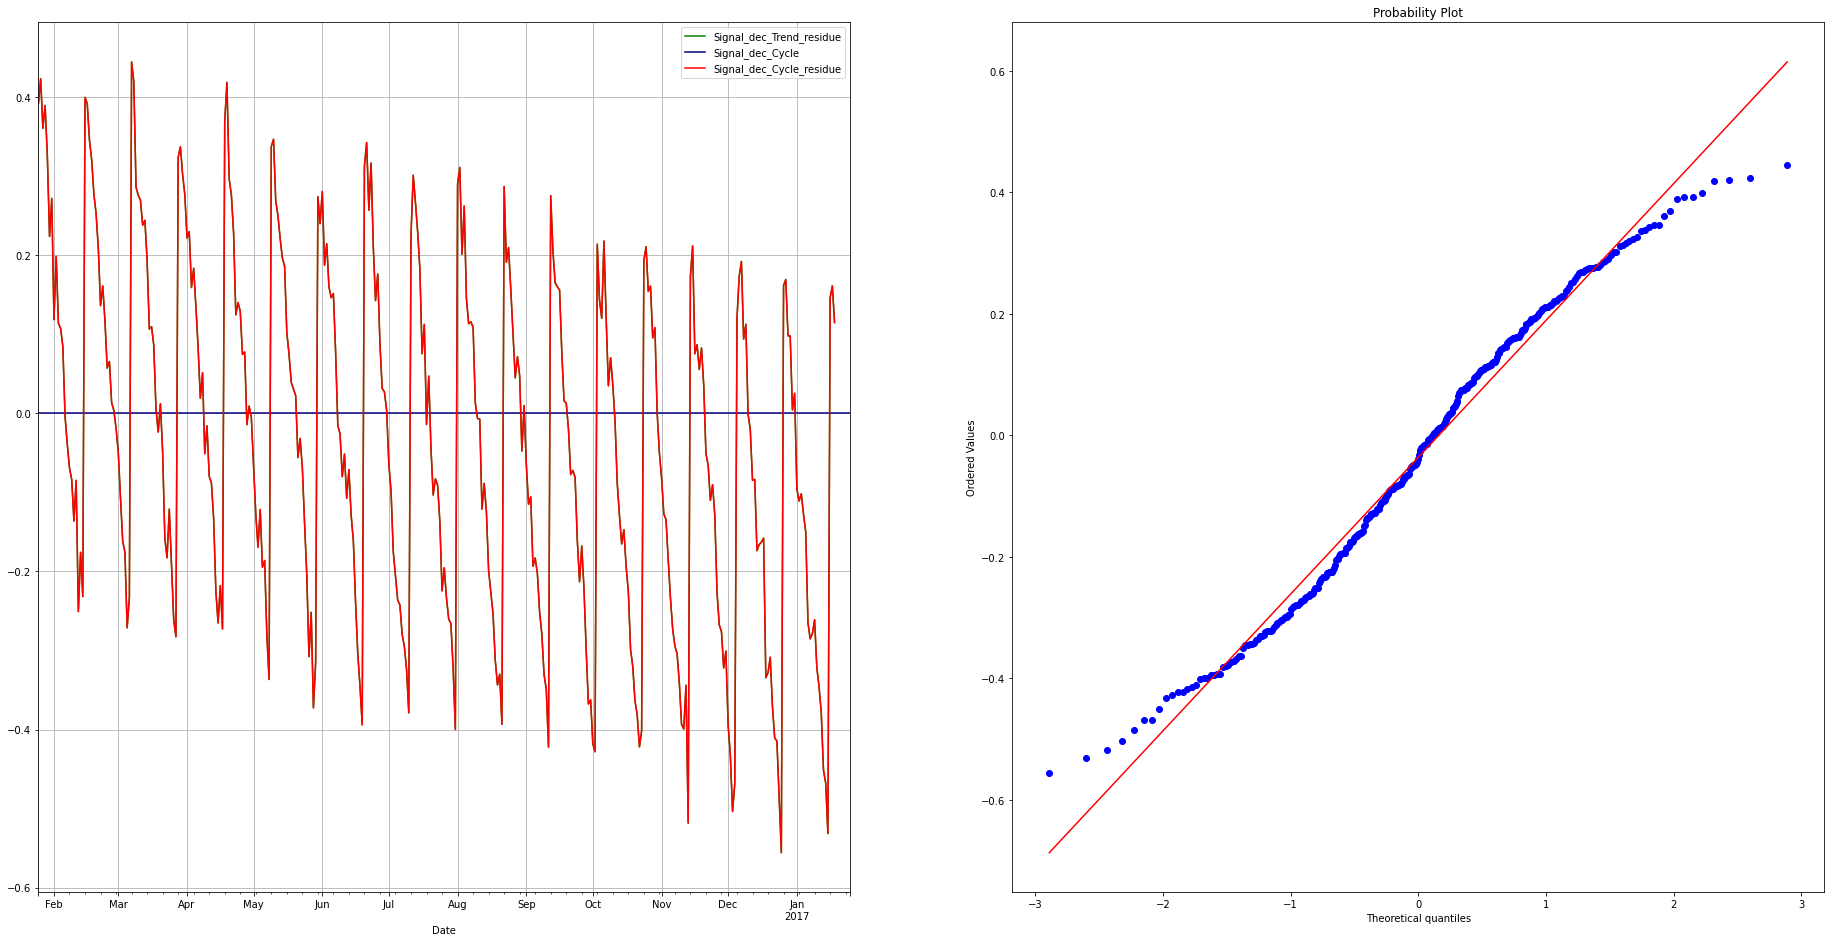

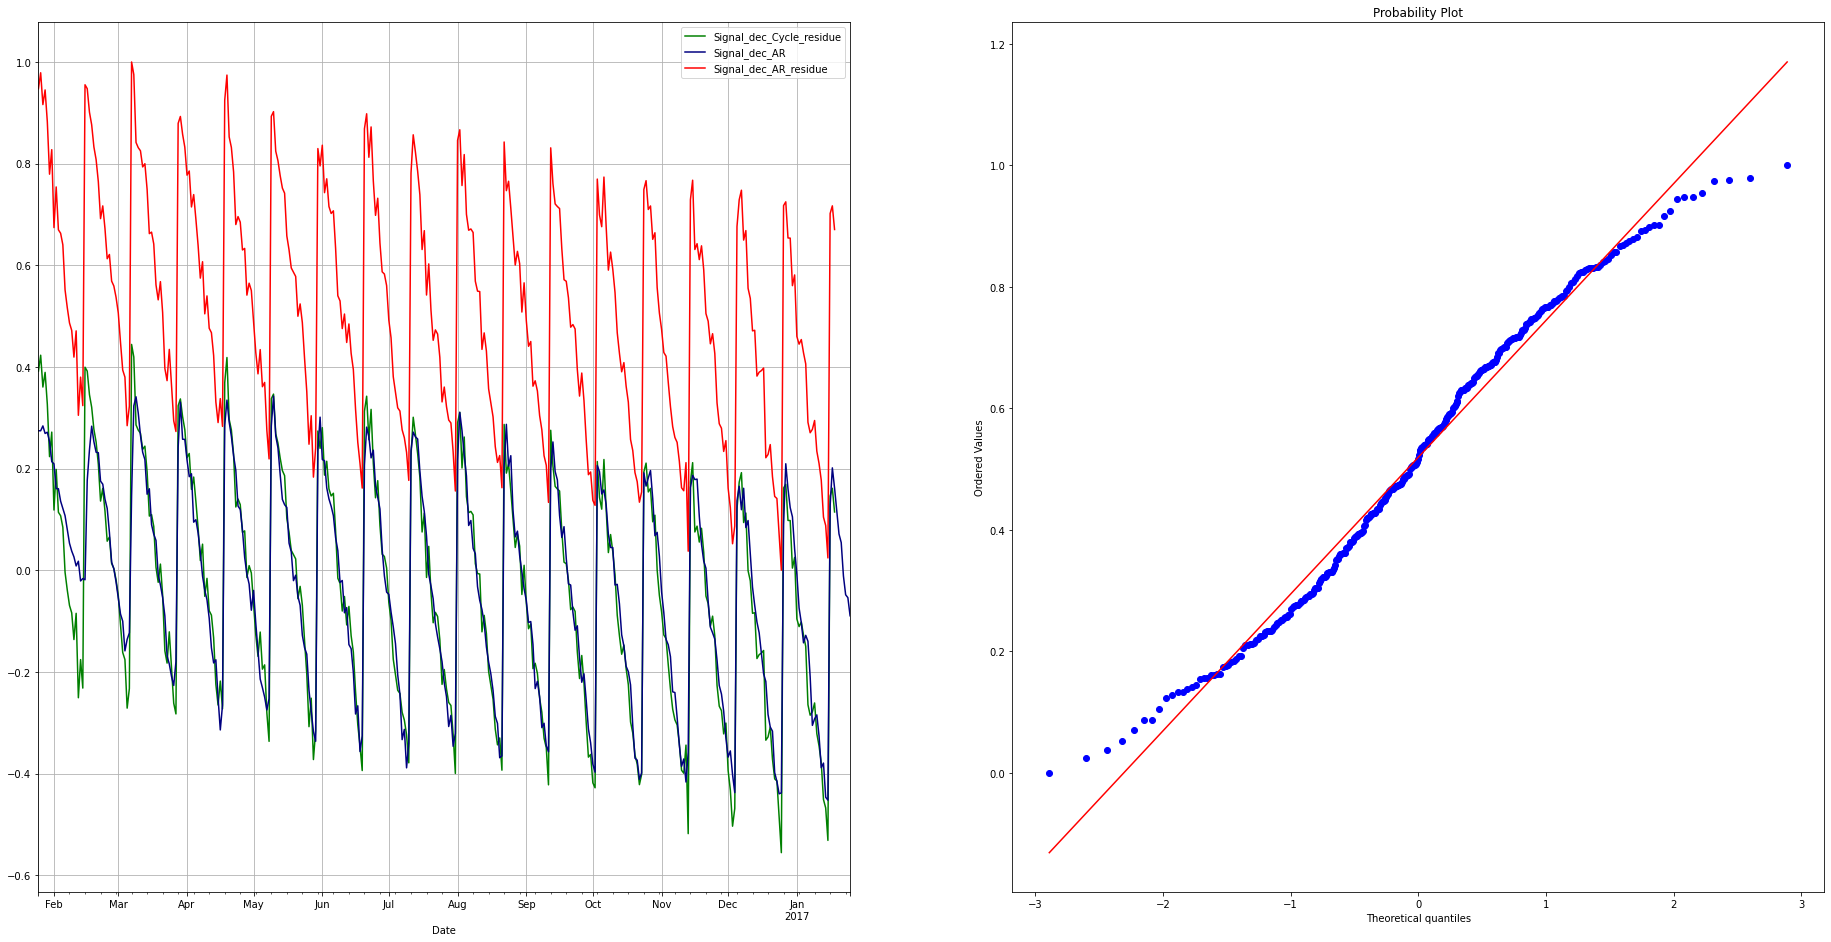

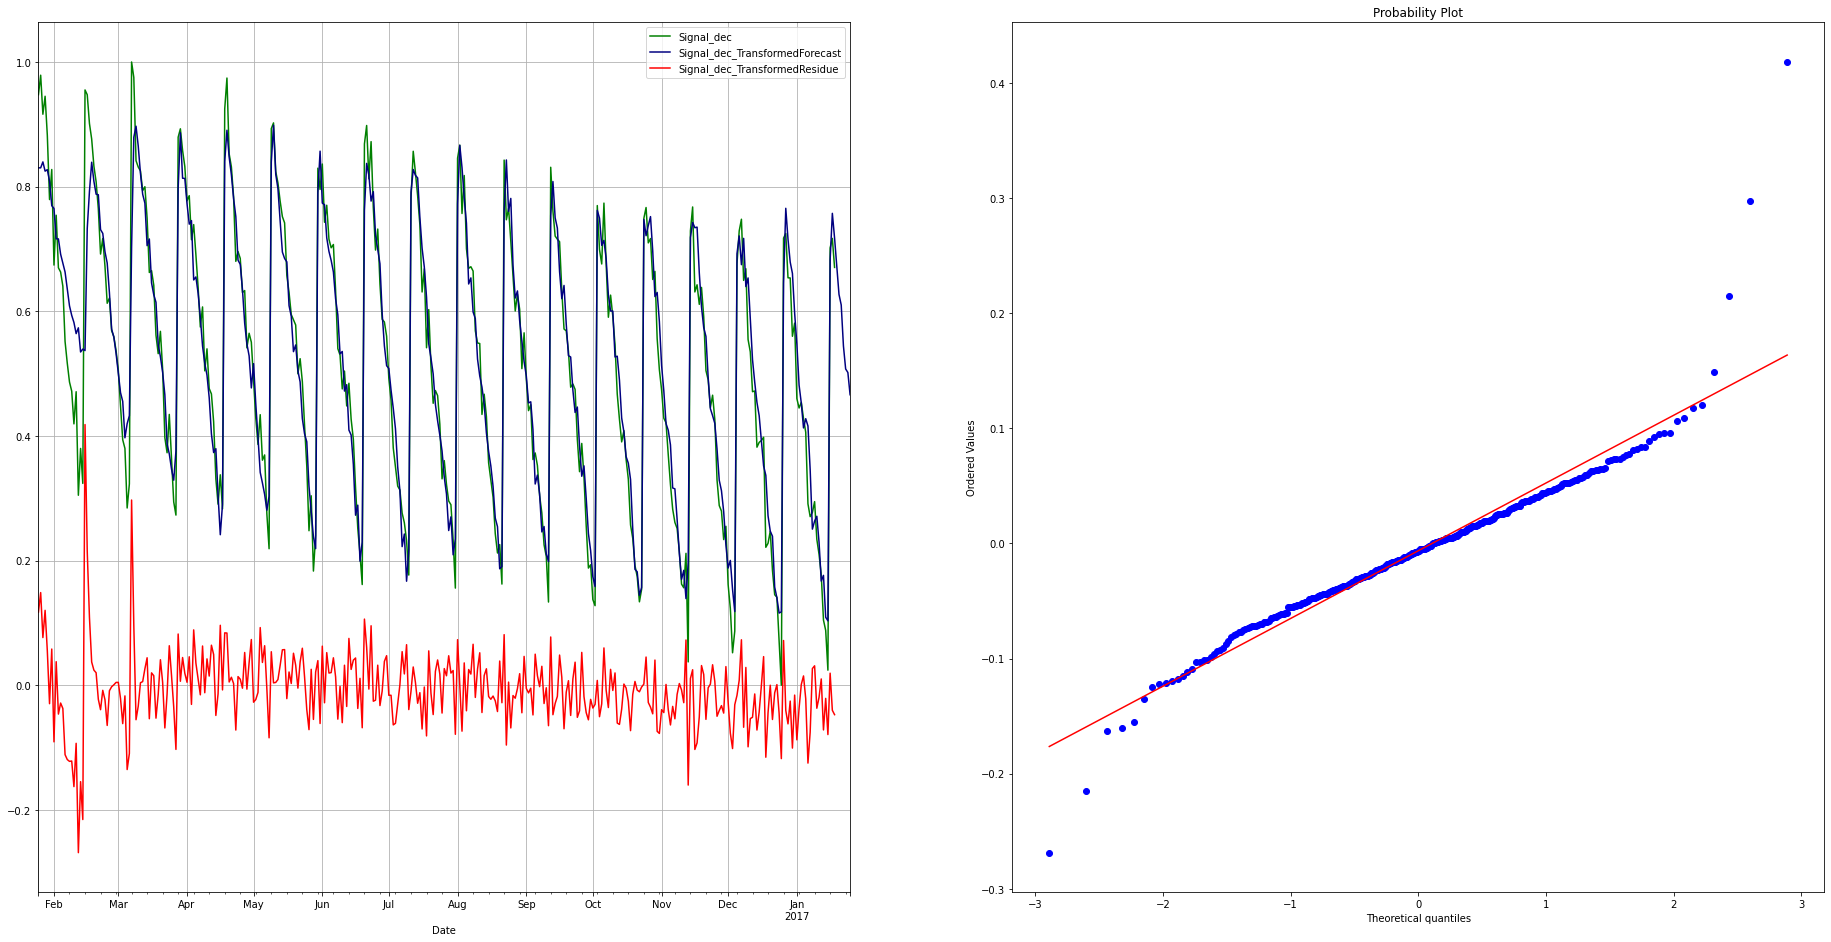

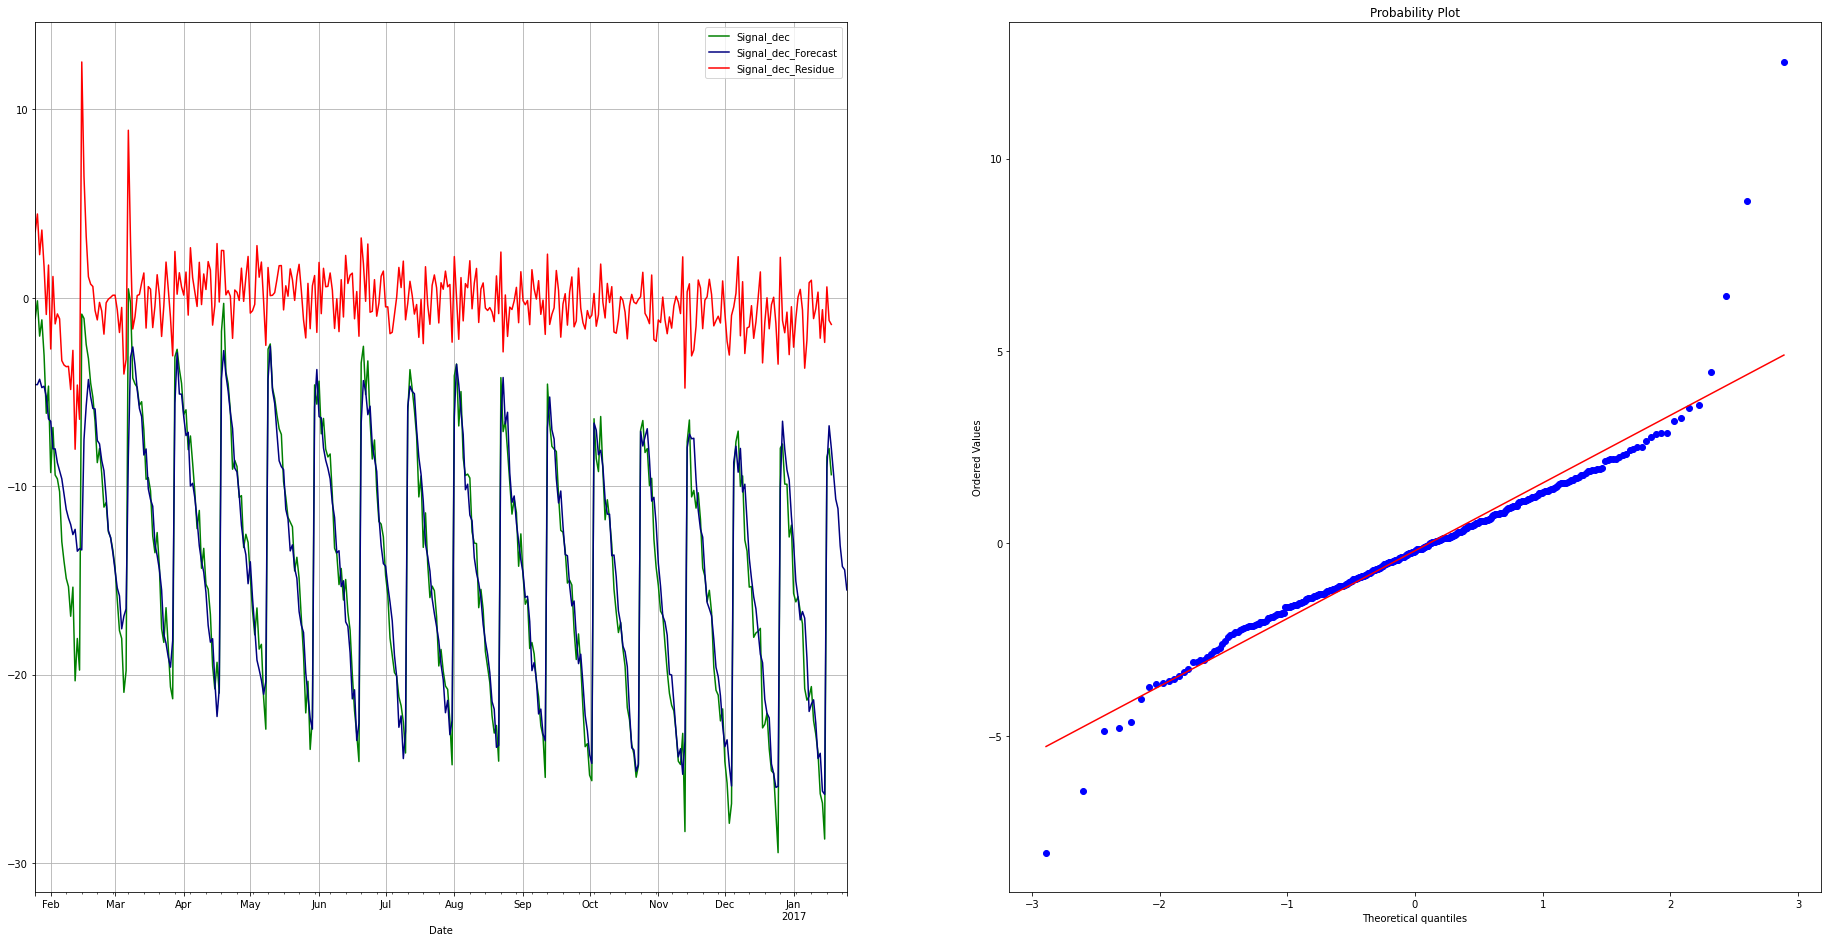

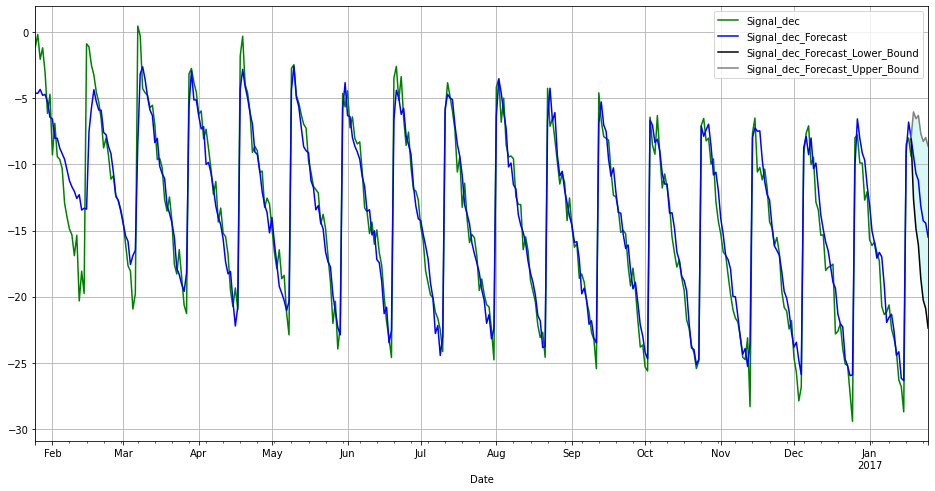

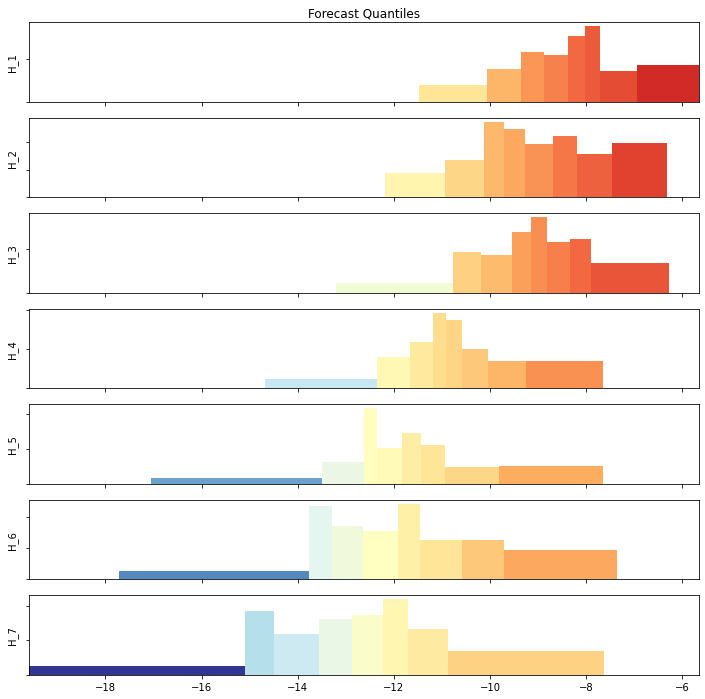

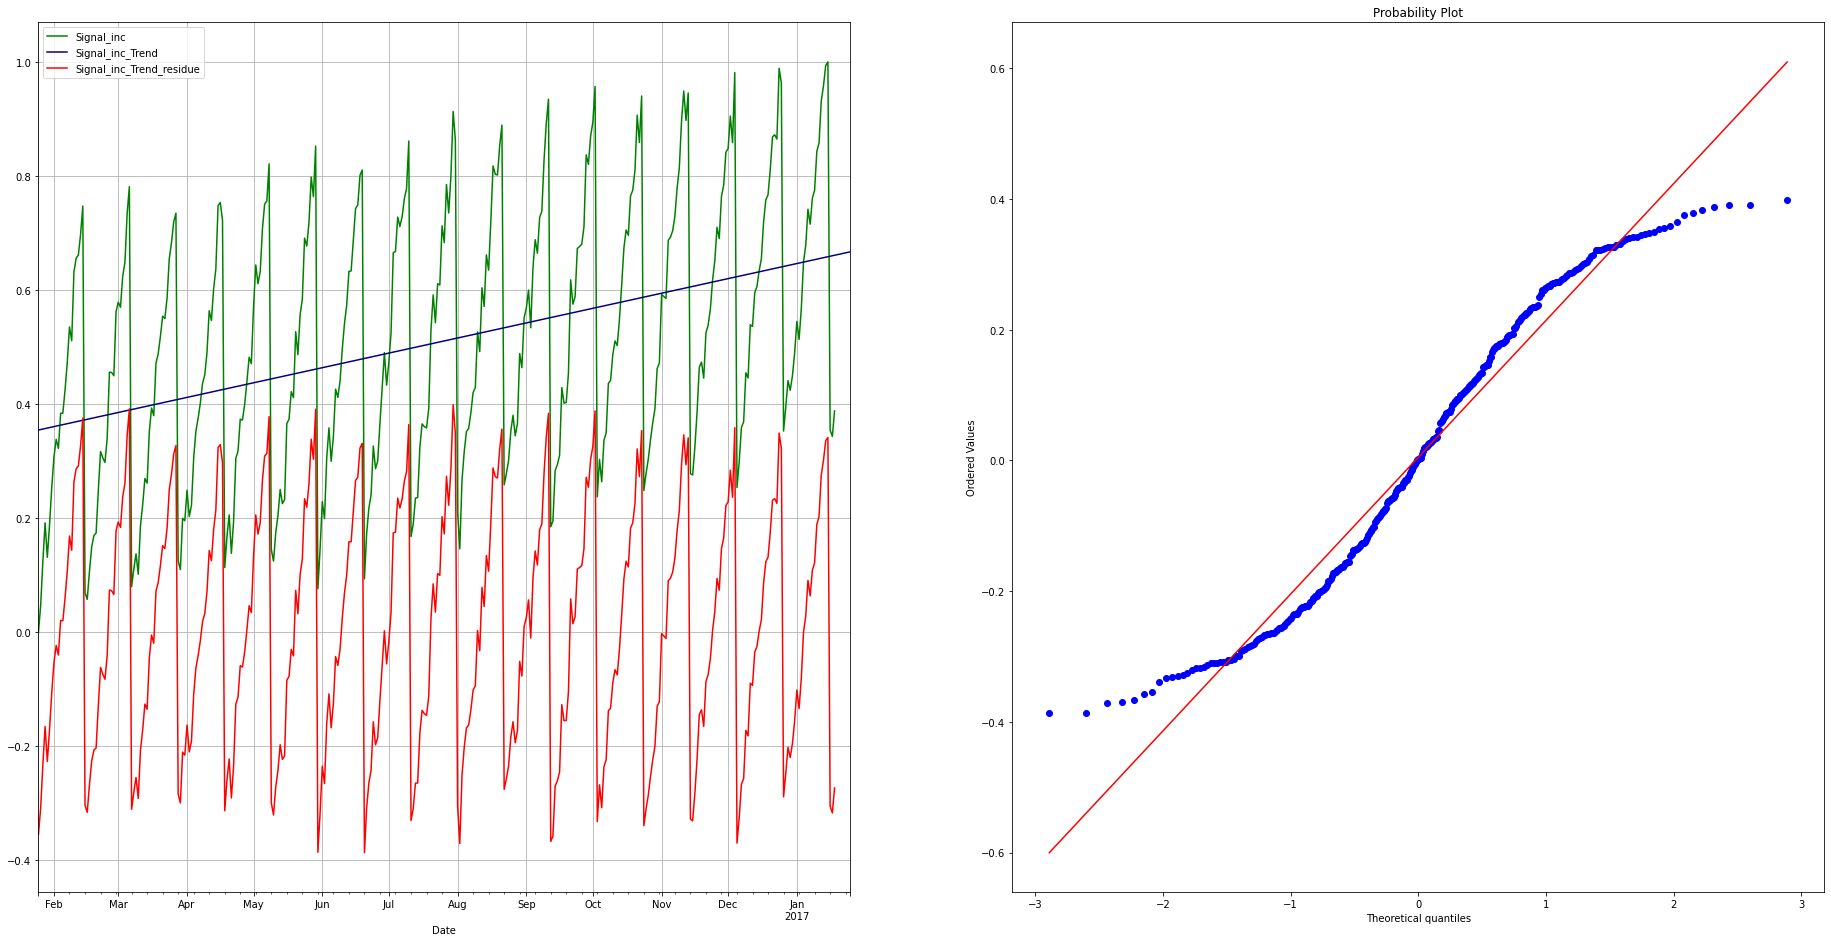

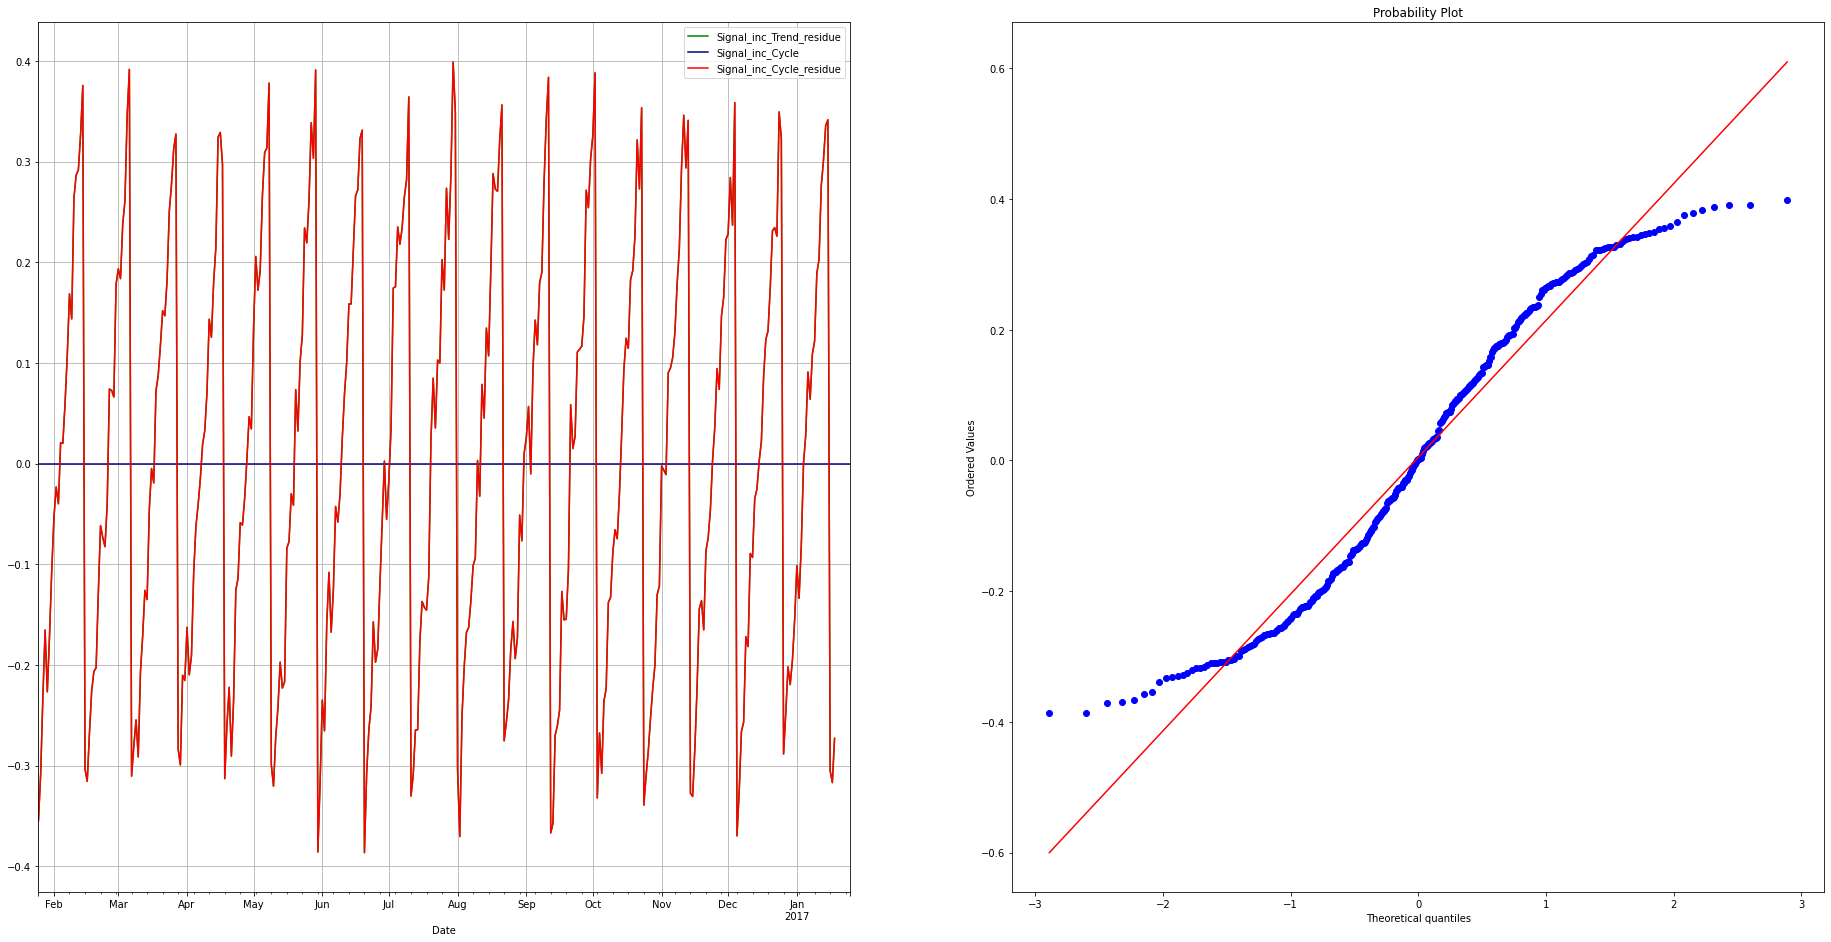

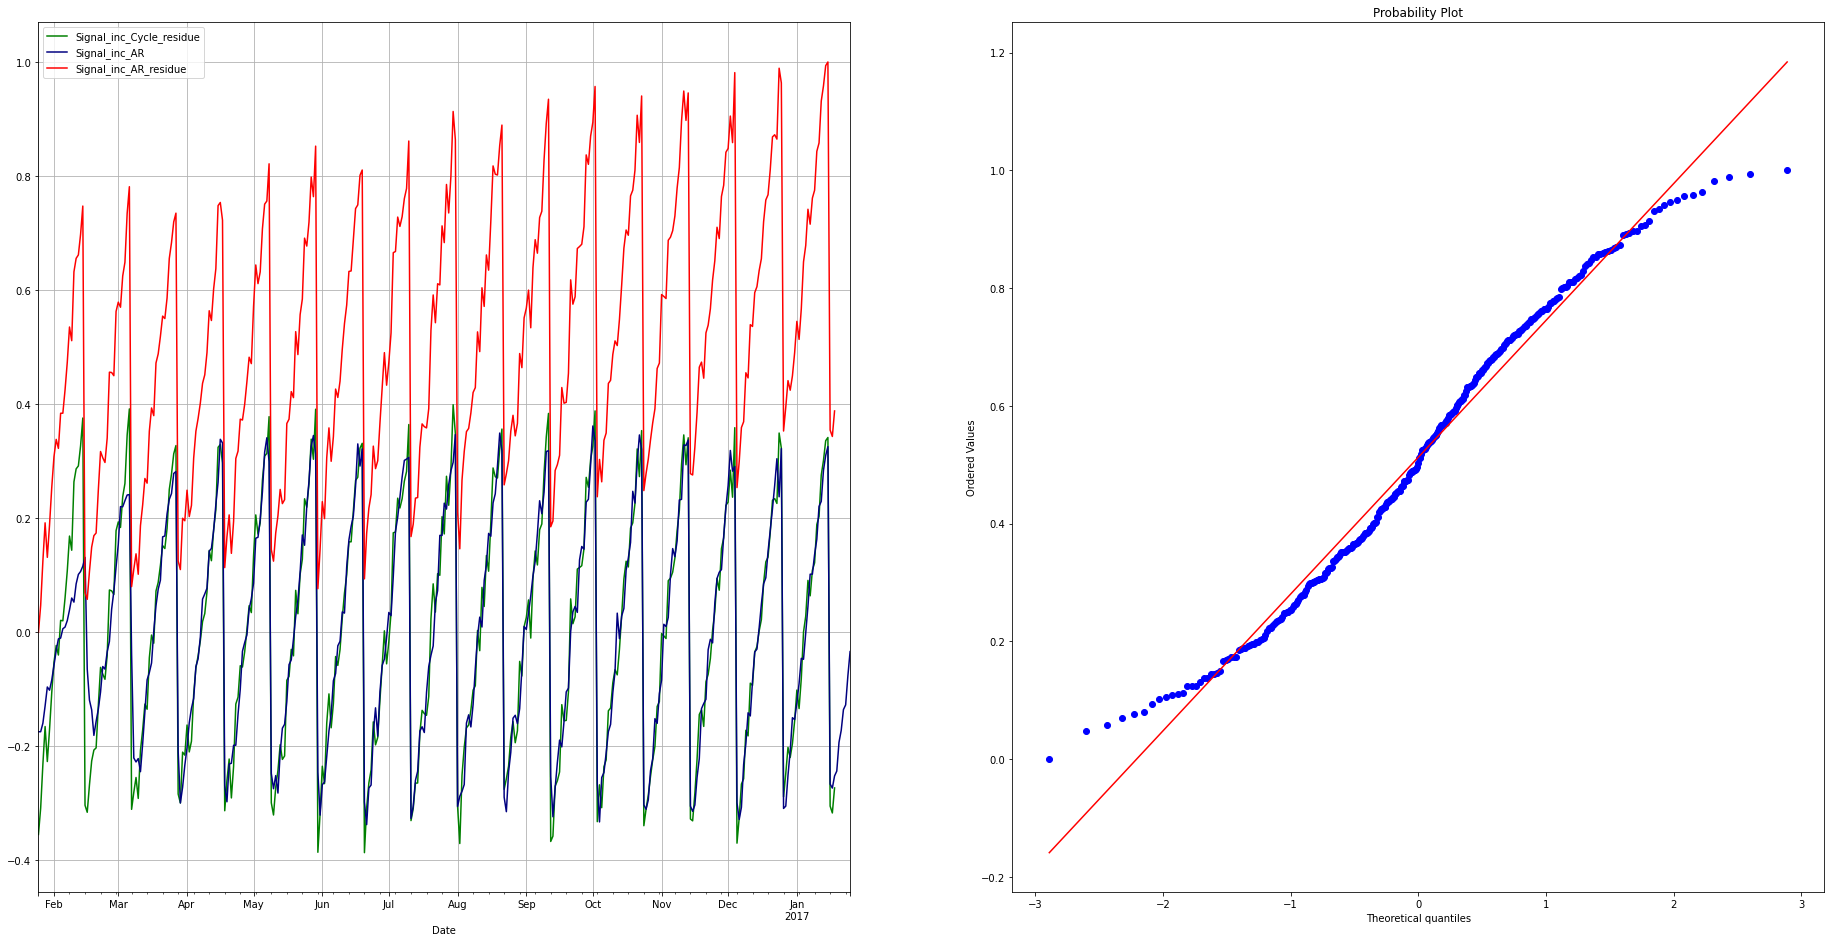

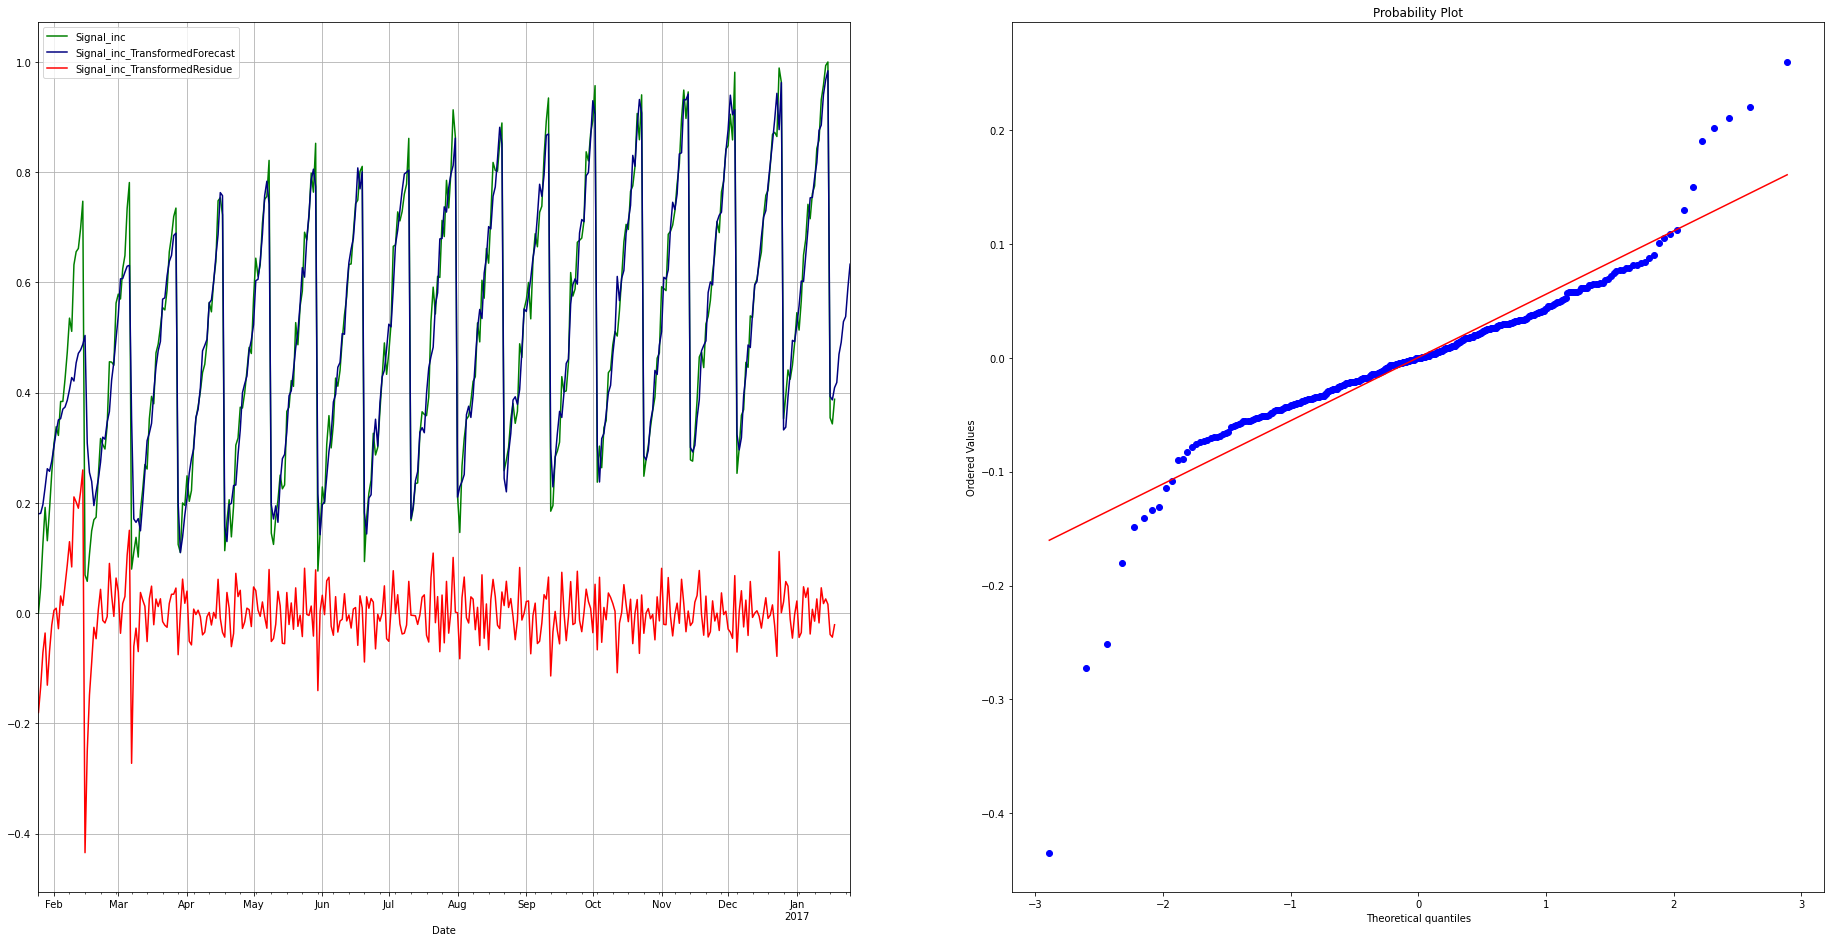

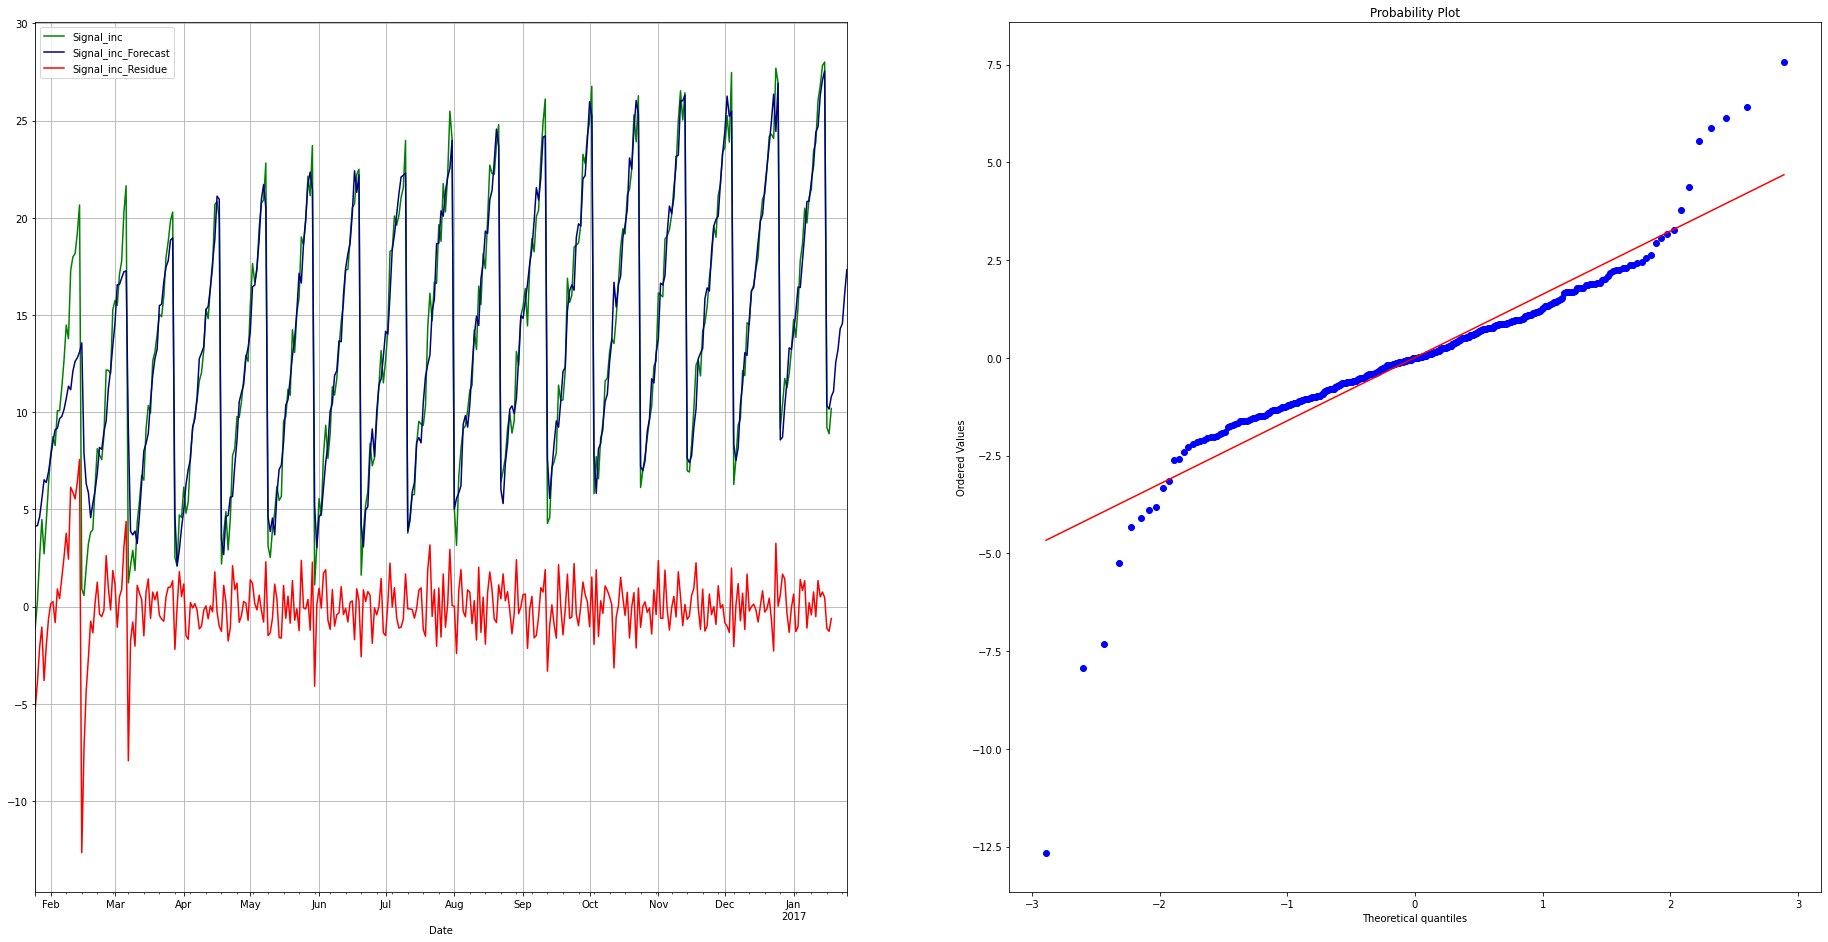

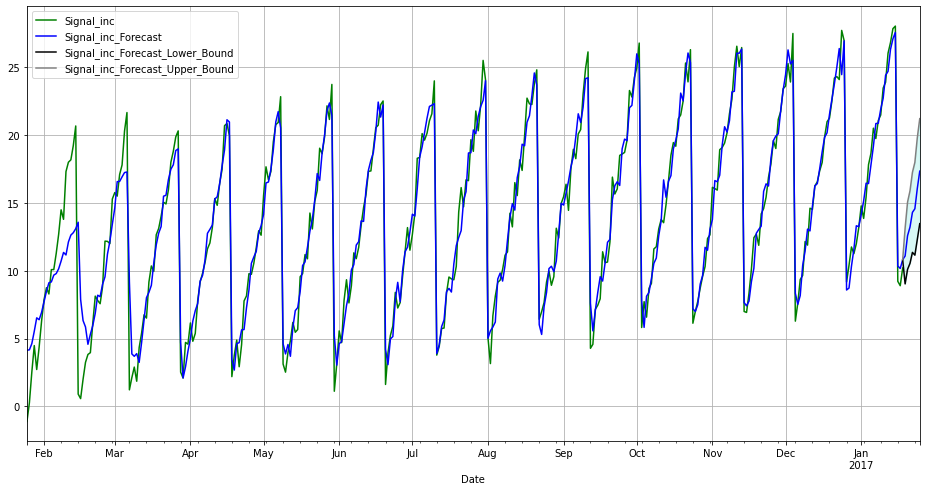

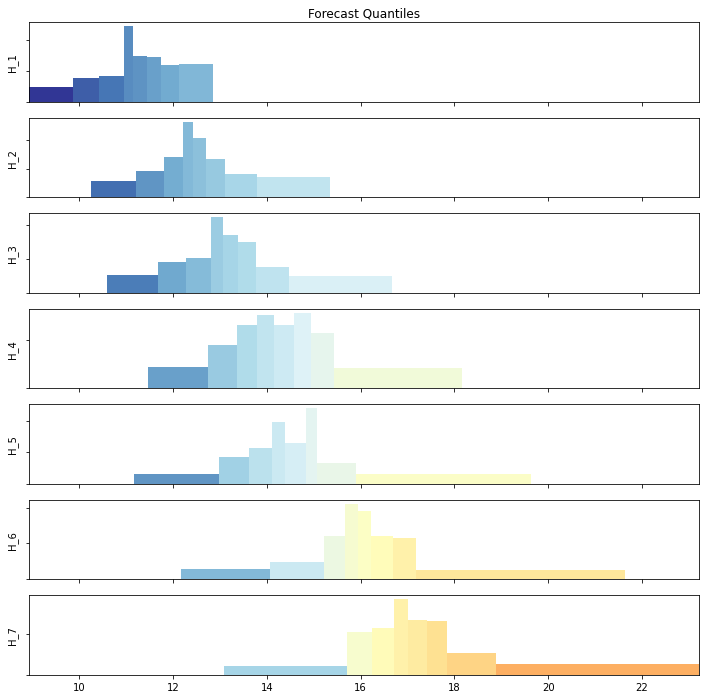

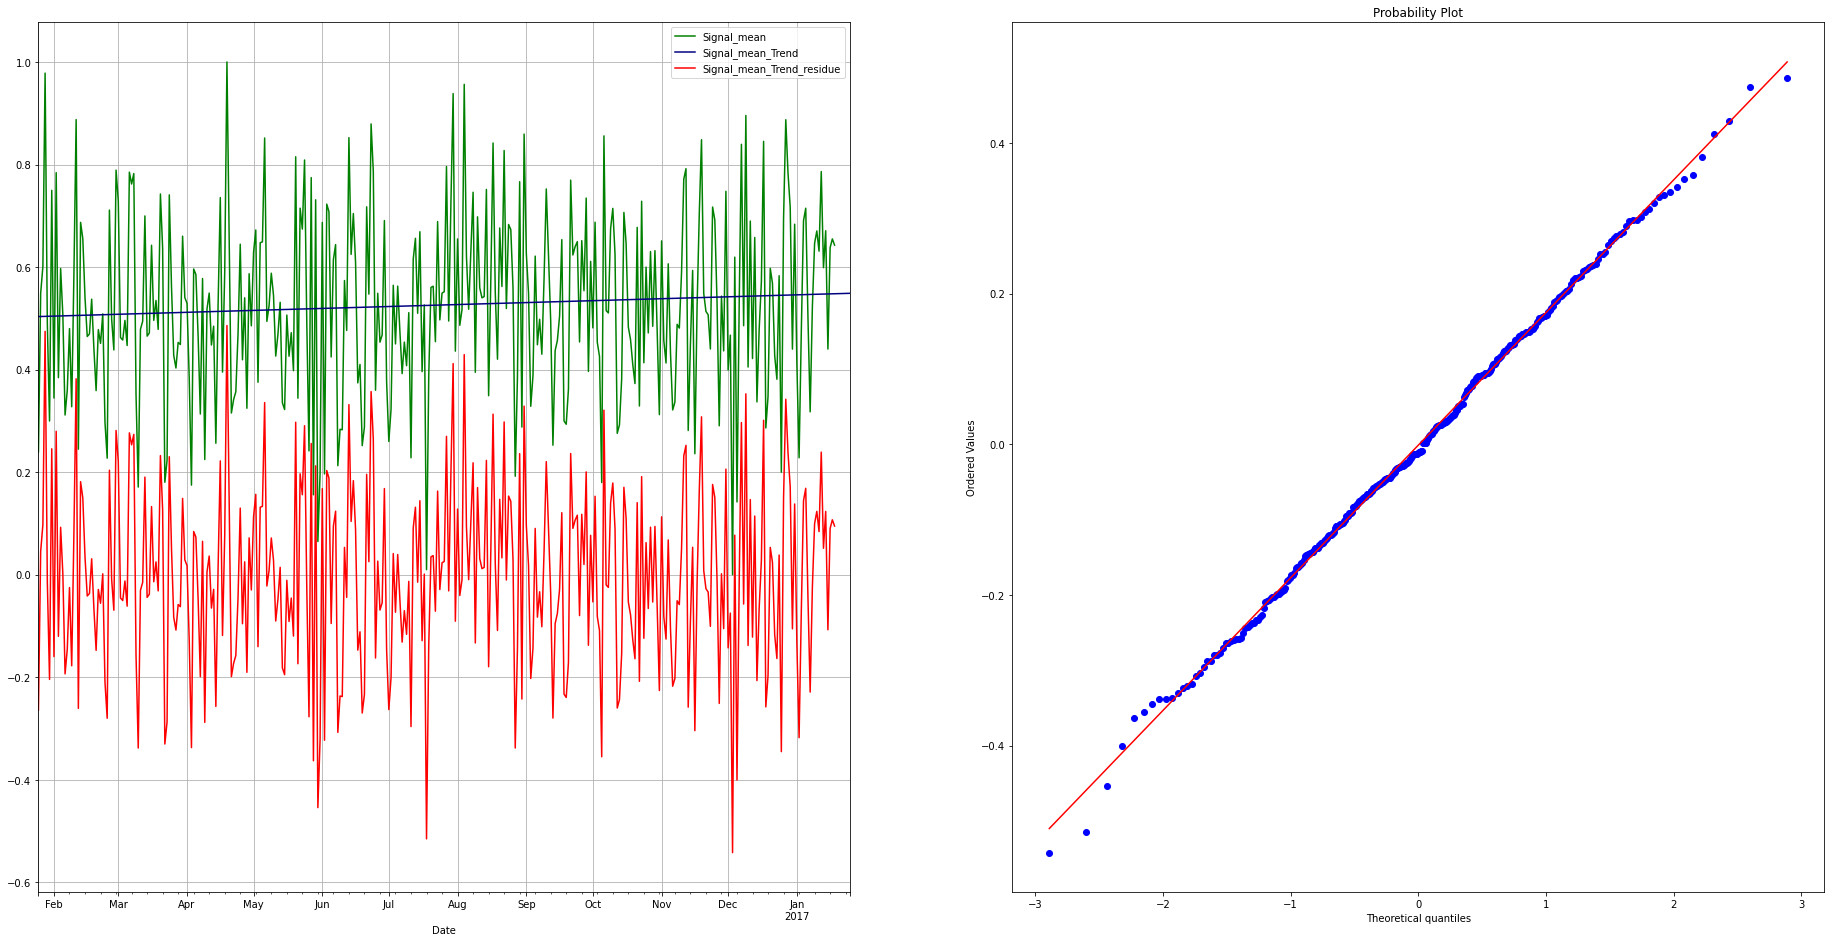

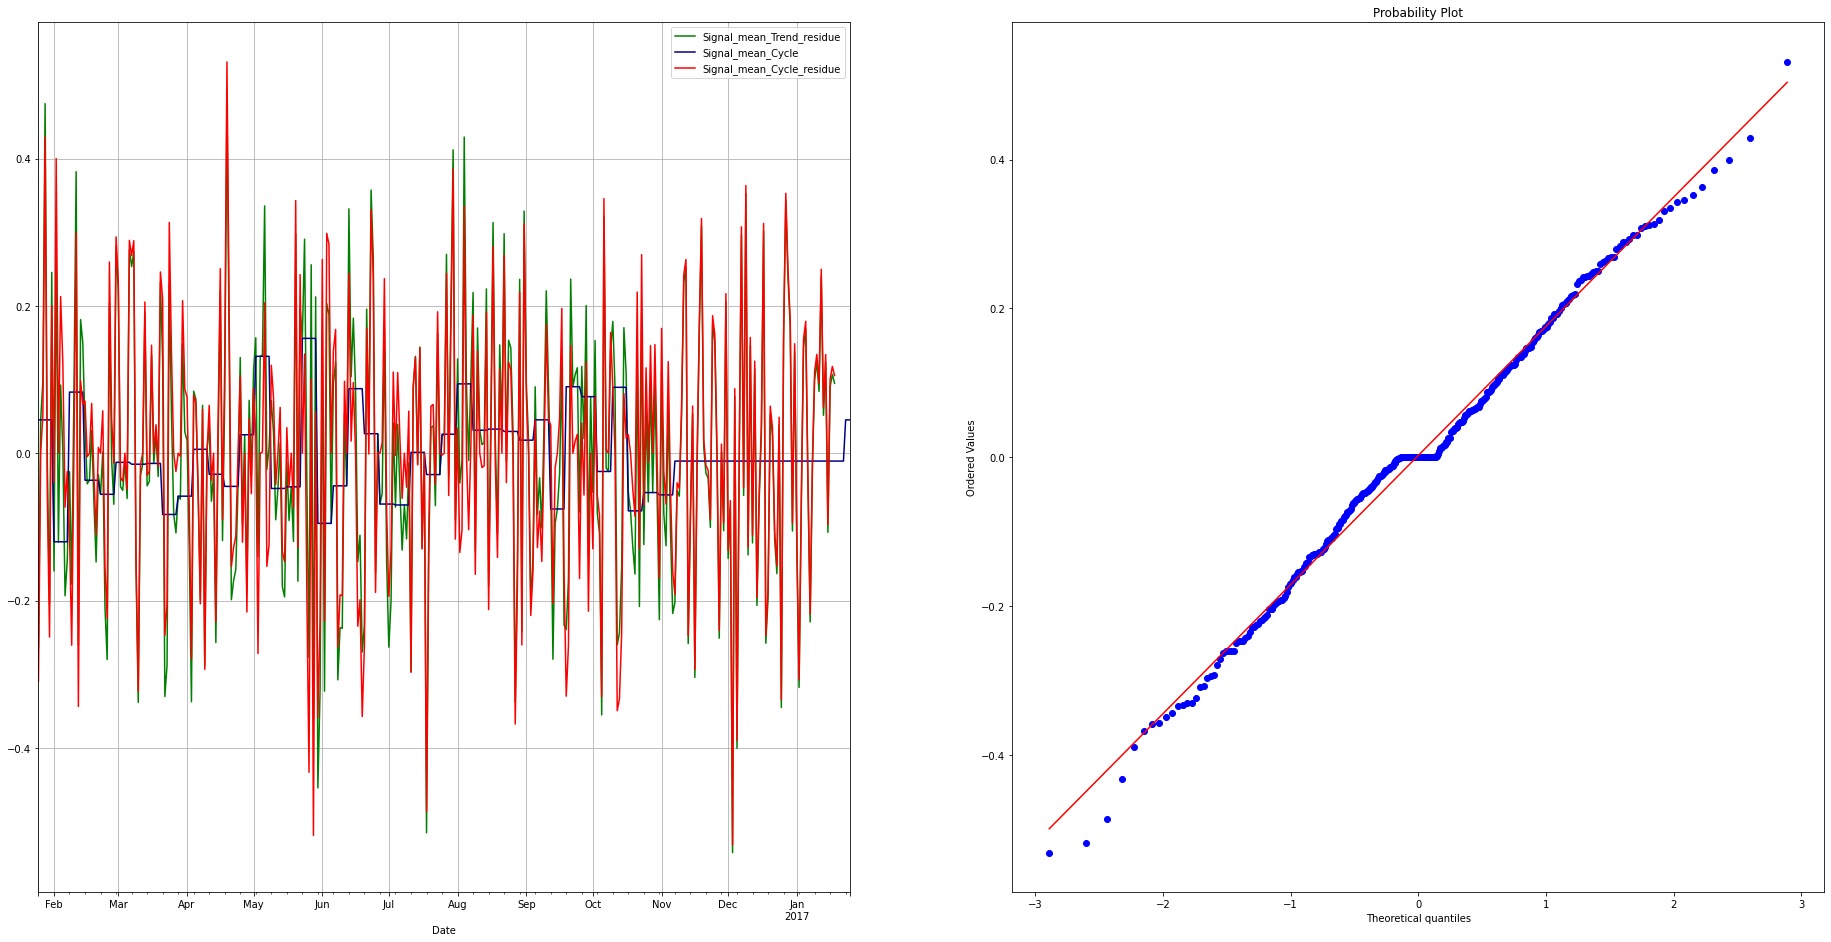

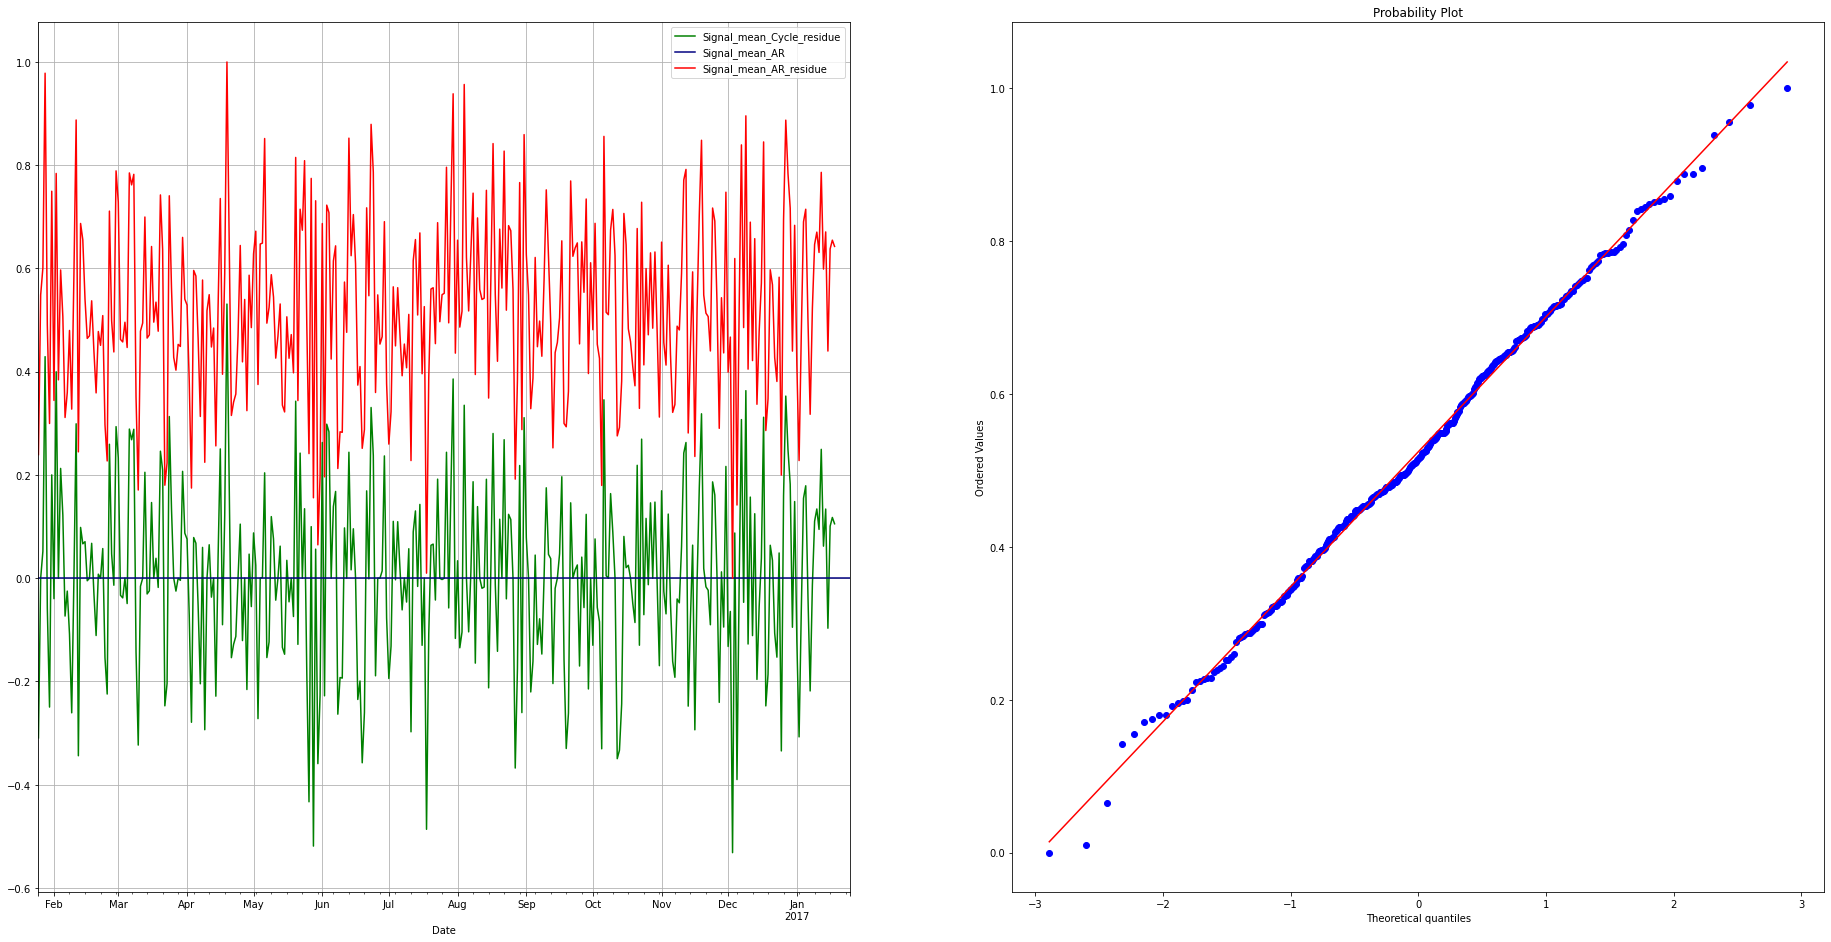

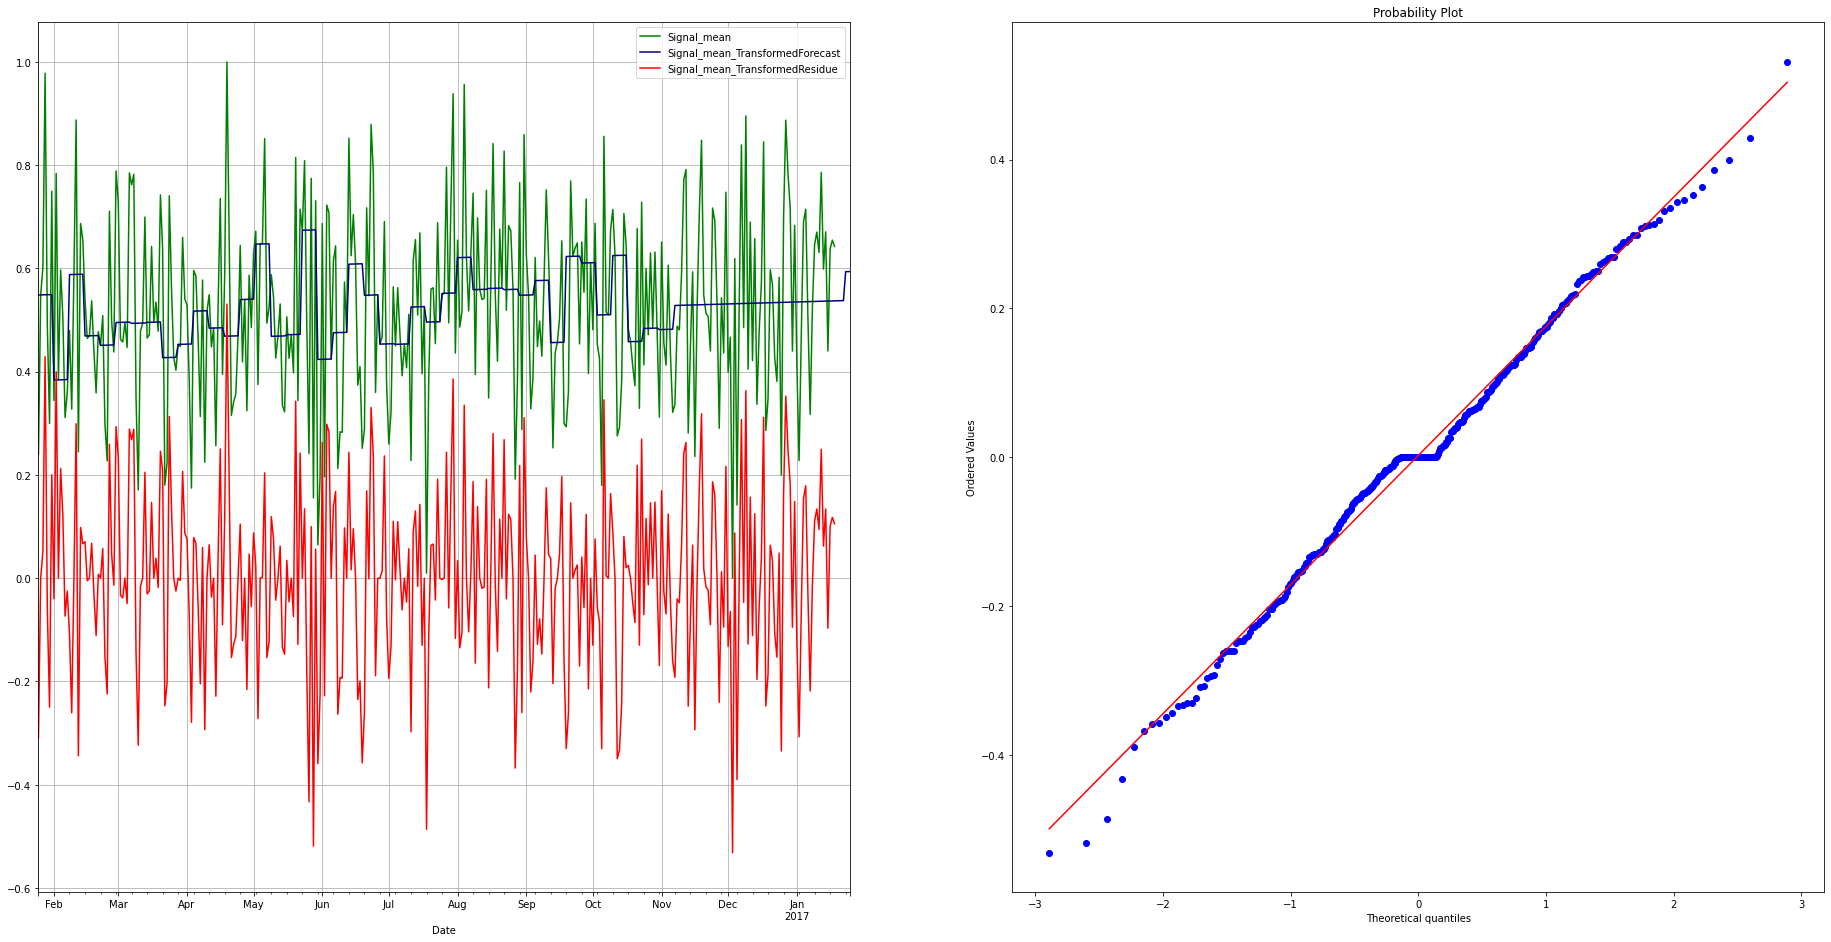

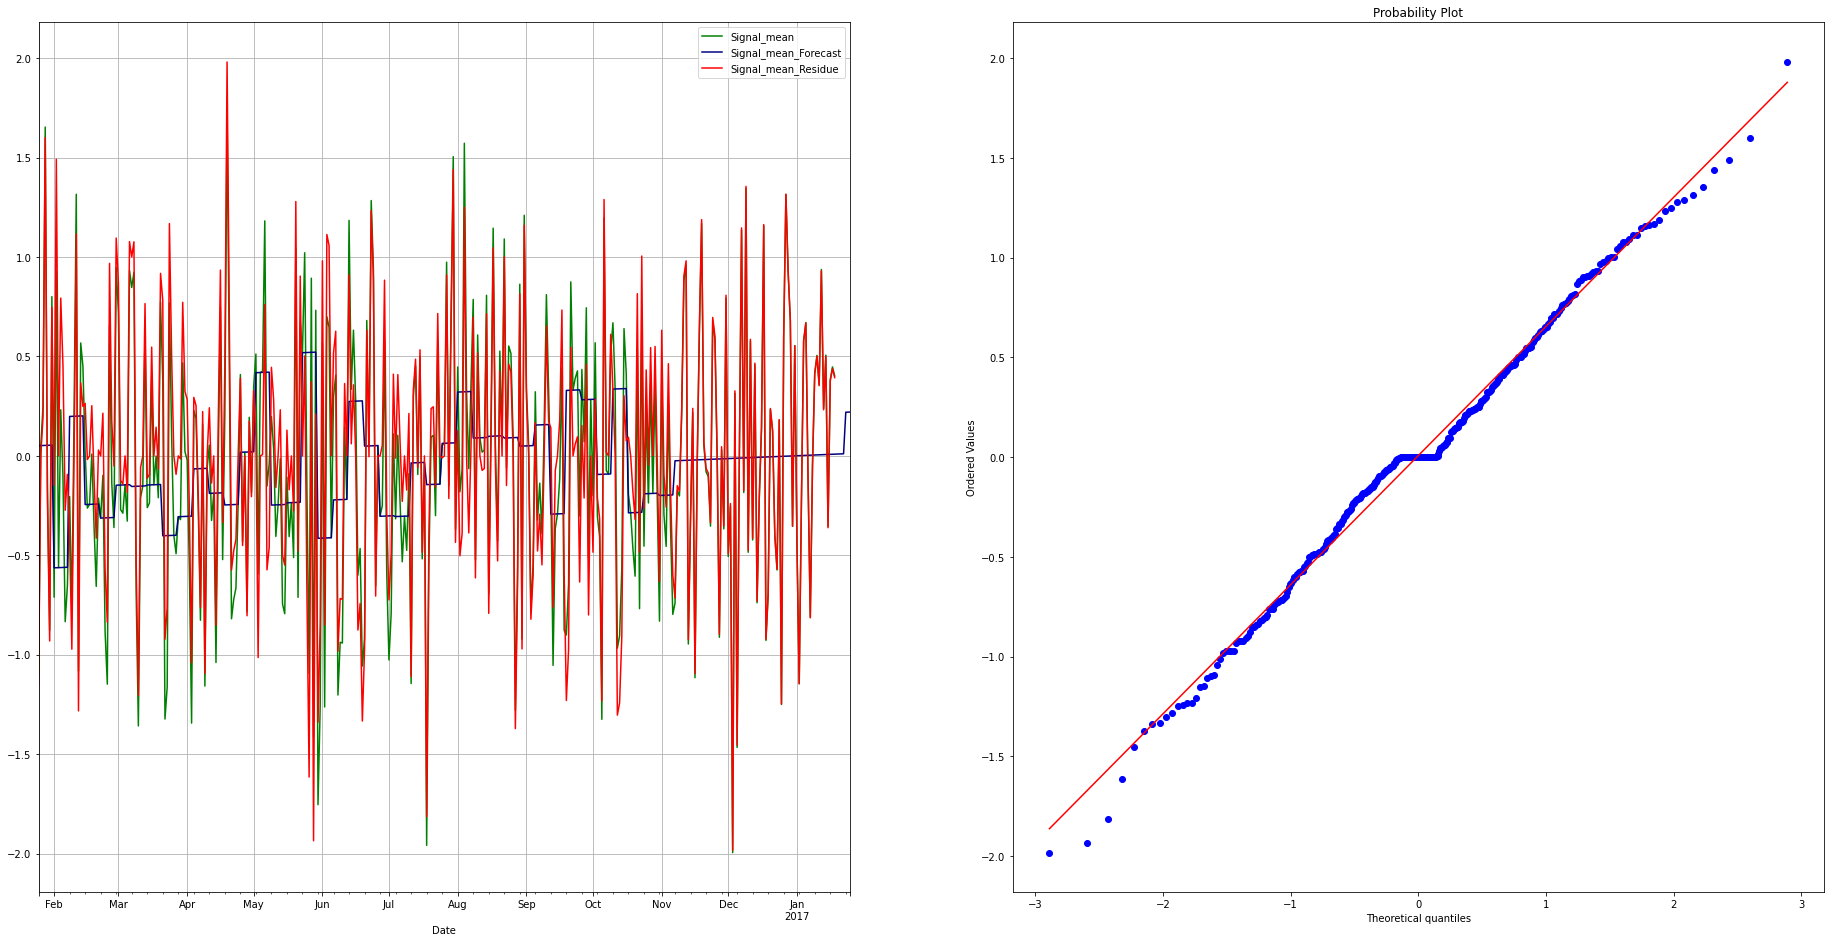

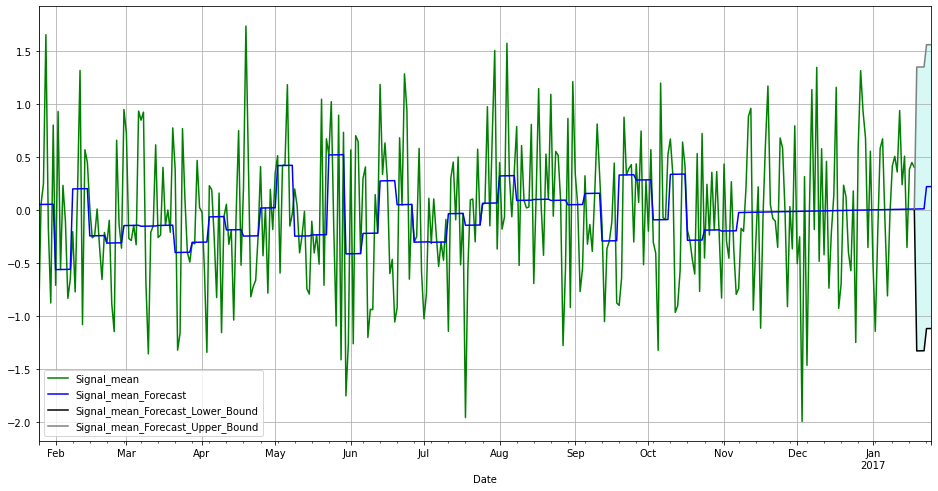

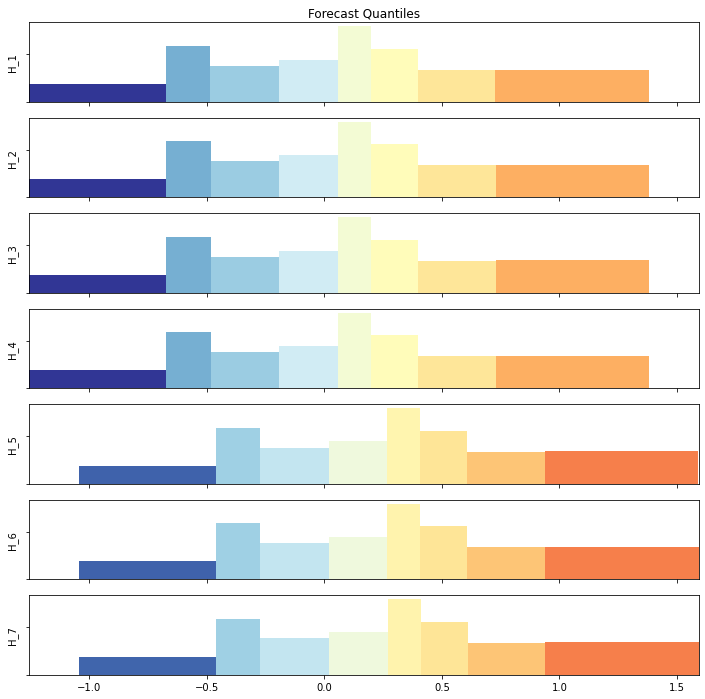

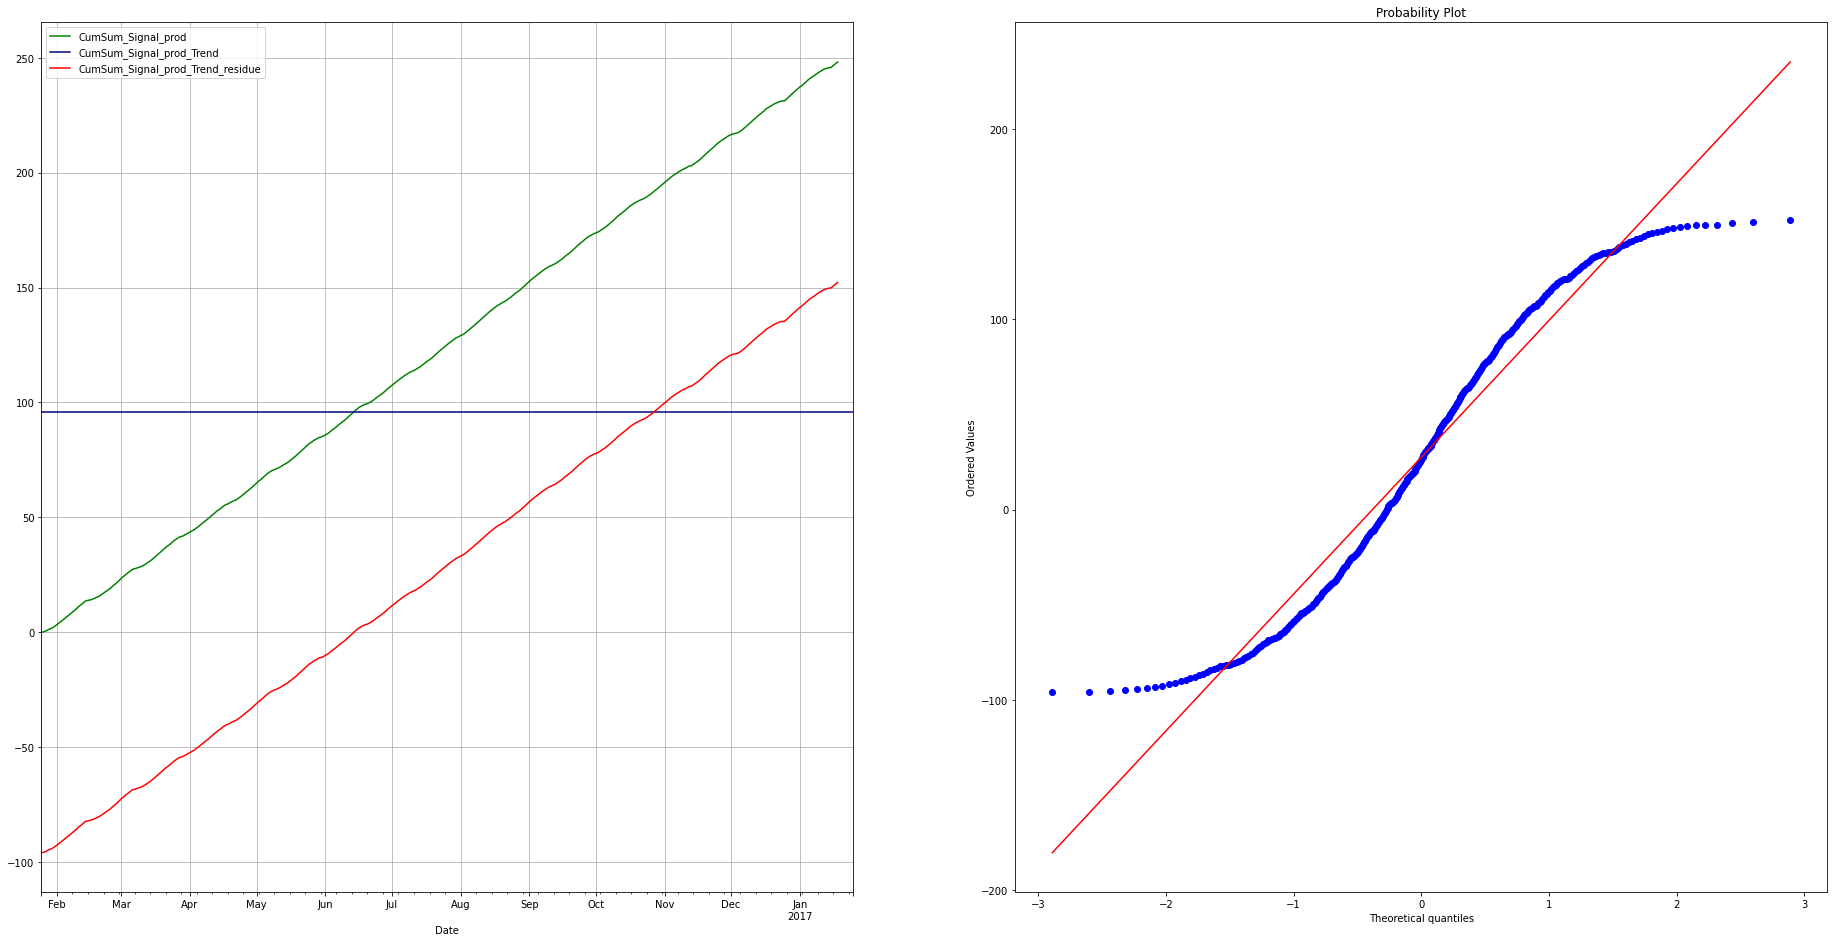

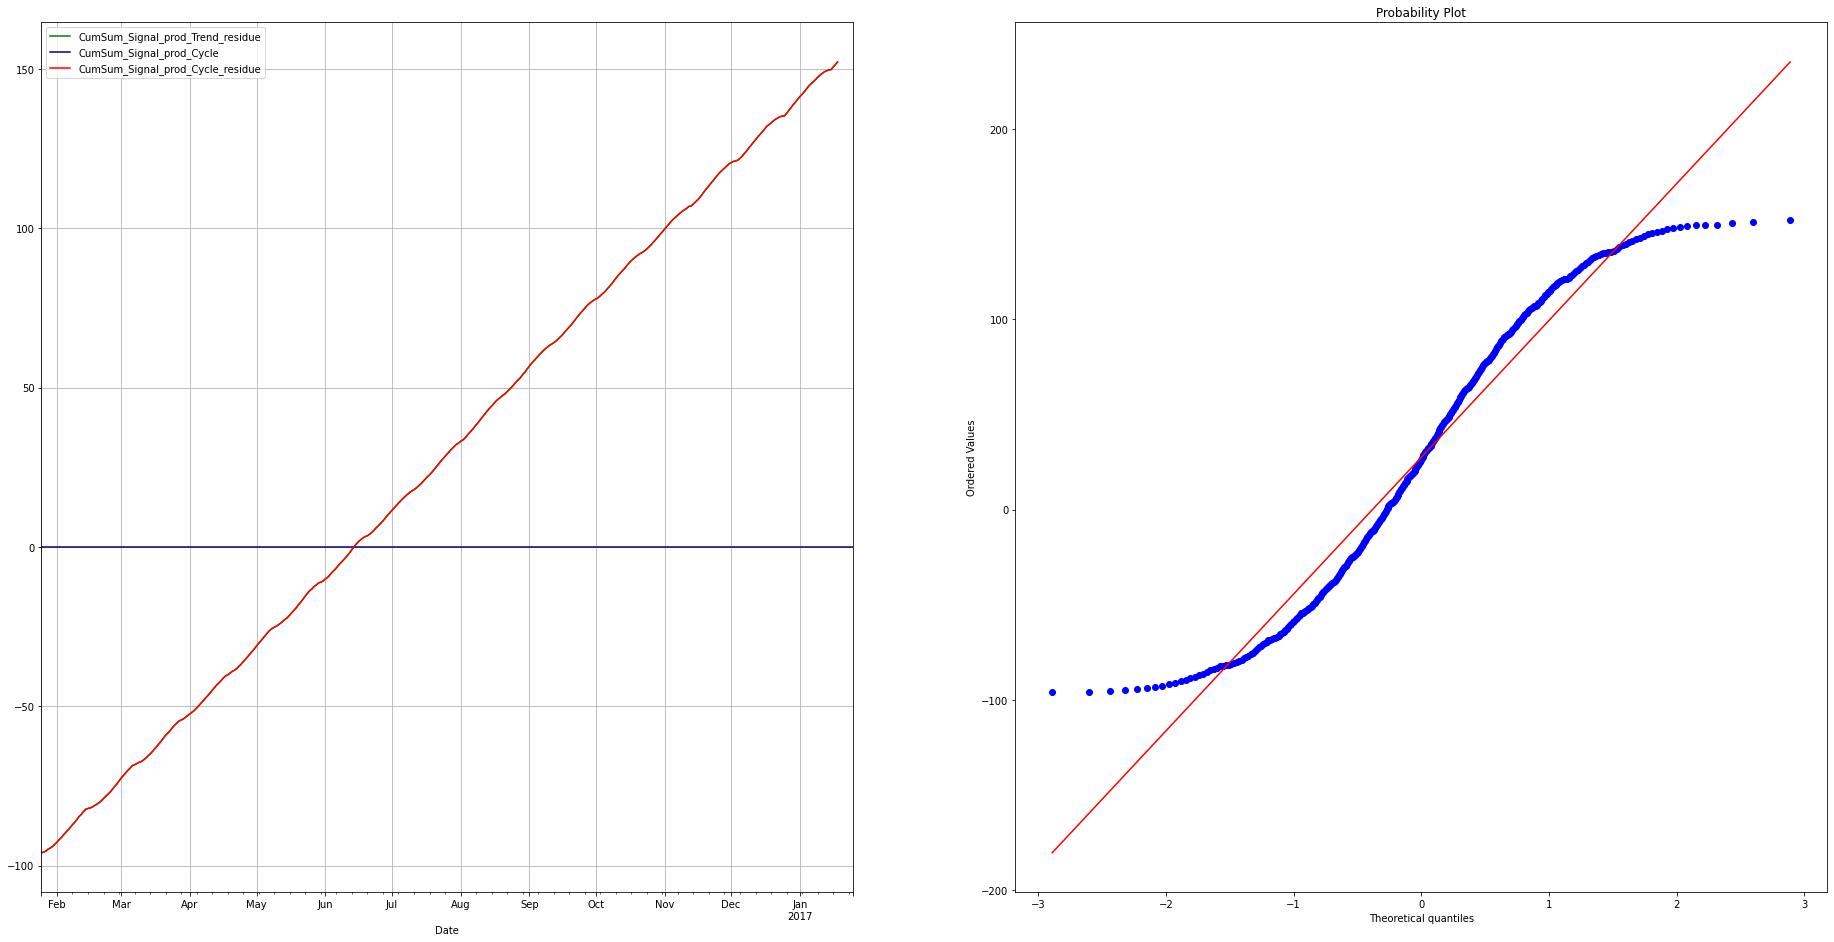

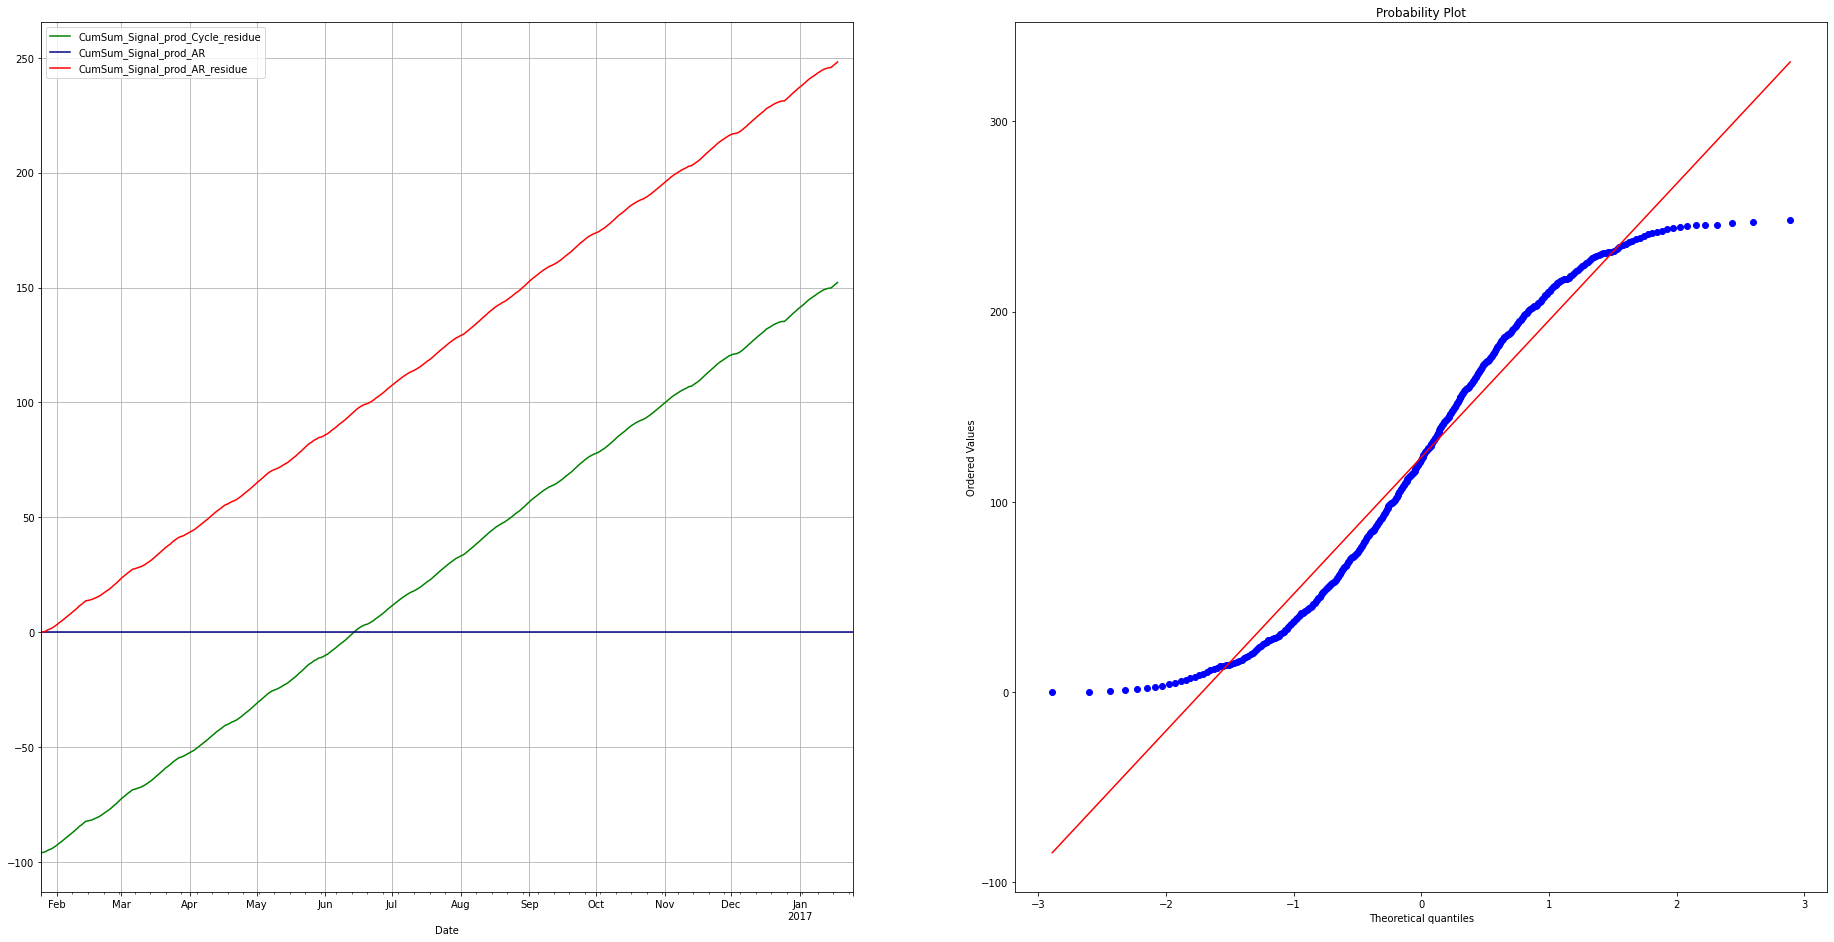

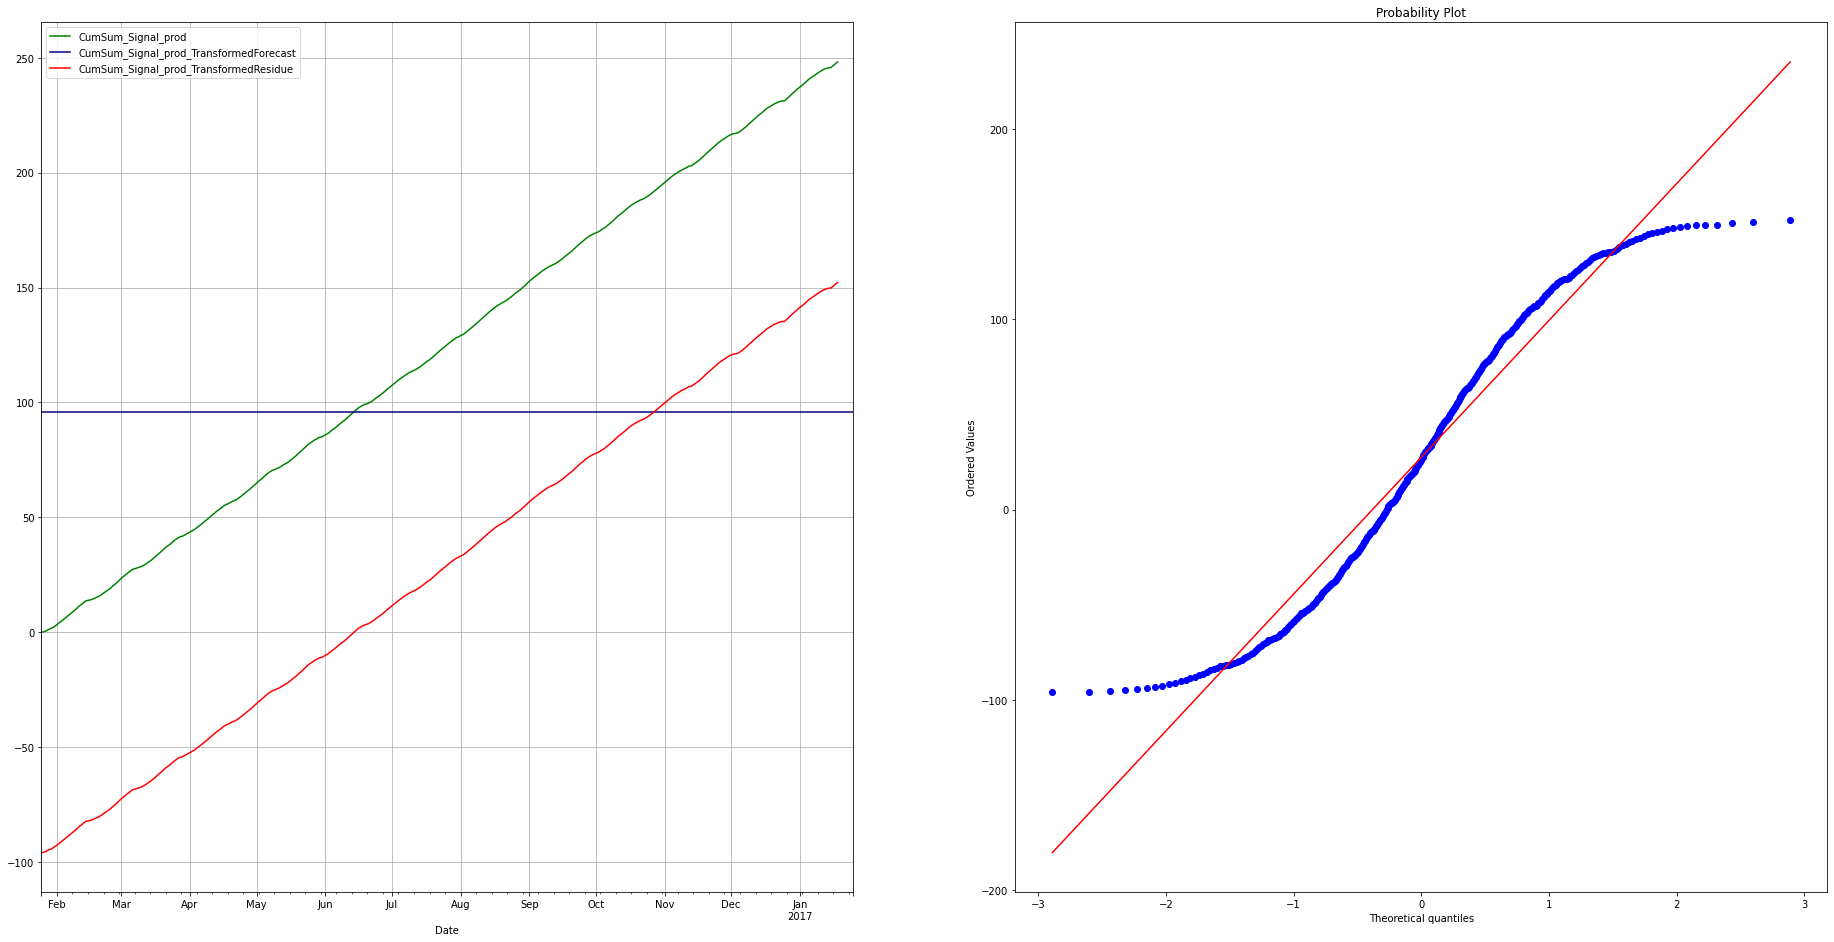

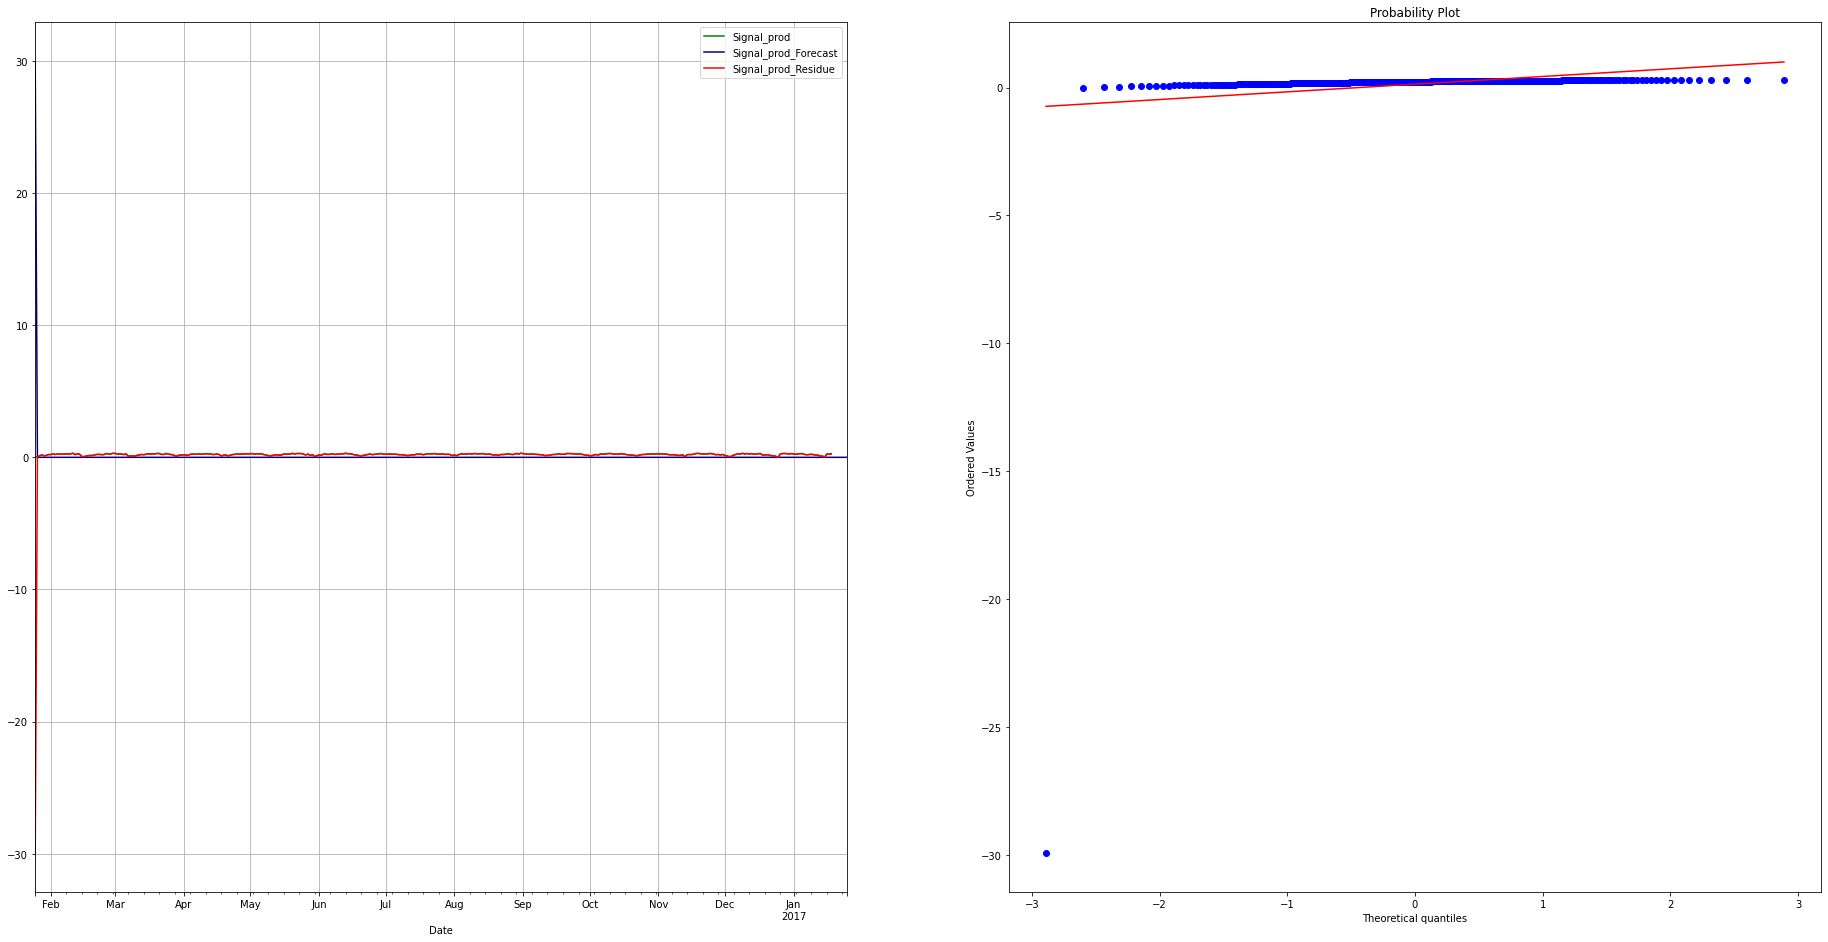

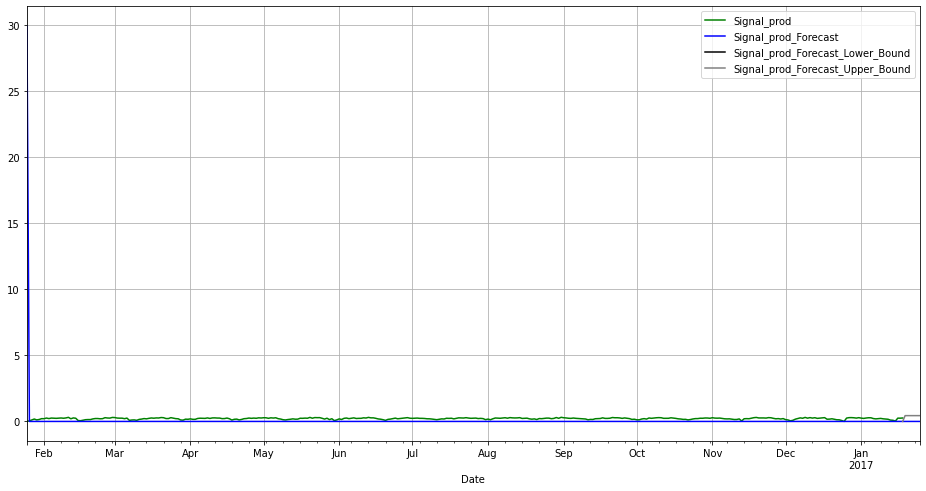

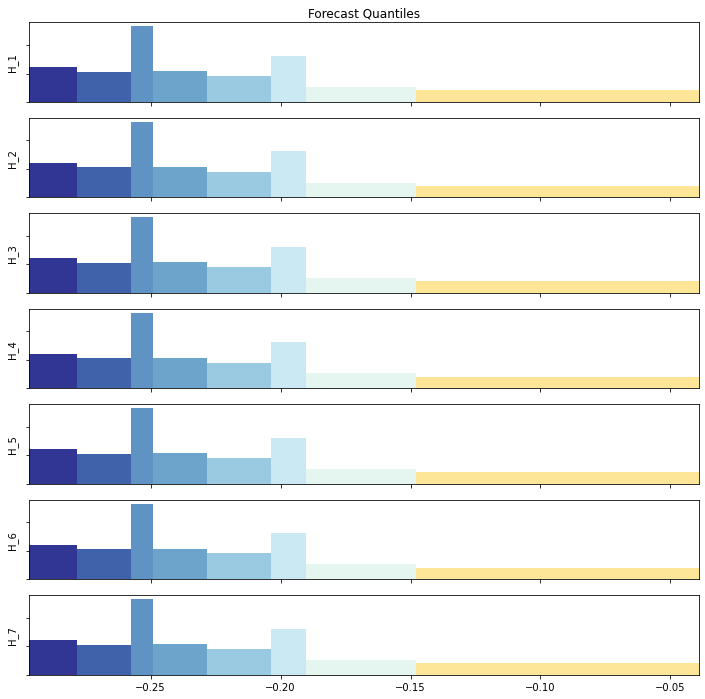

In [6]:
lEngine.standardPlots()

In [7]:

# predict one week
df_forecast = lEngine.forecast(iInputDS = df_train, iHorizon = 7)
# list the columns of the forecast dataset
print(df_forecast.columns) #

# print the real forecasts
print(df_forecast['Date'].tail(7).values)

print(df_forecast['Signal_inc_Forecast'].tail(7).values)
print(df_forecast['Signal_dec_Forecast'].tail(7).values)
print(df_forecast['Signal_mean_Forecast'].tail(7).values)
print(df_forecast['Signal_prod_Forecast'].tail(7).values)

INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['Signal_dec', 'Signal_inc', 'Signal_mean', 'Signal_prod'], 'Horizon': 7}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.418, ('FORECASTING', {'Signals': ['Signal_dec', 'Signal_inc', 'Signal_mean', 'Signal_prod'], 'Horizon': 7}))


Index(['Date', 'Signal_dec', 'row_number', 'Date_Normalized', '_Signal_dec',
       '_Signal_dec_ConstantTrend', '_Signal_dec_ConstantTrend_residue',
       '_Signal_dec_ConstantTrend_residue_bestCycle_byMAPE',
       '_Signal_dec_ConstantTrend_residue_bestCycle_byMAPE_residue',
       '_Signal_dec_ConstantTrend_residue_bestCycle_byMAPE_residue_AR(64)',
       ...
       'Signal_prod_Forecast_Upper_Bound', 'Signal_prod_Forecast_Quantile_2',
       'Signal_prod_Forecast_Quantile_14', 'Signal_prod_Forecast_Quantile_26',
       'Signal_prod_Forecast_Quantile_38', 'Signal_prod_Forecast_Quantile_50',
       'Signal_prod_Forecast_Quantile_62', 'Signal_prod_Forecast_Quantile_74',
       'Signal_prod_Forecast_Quantile_86', 'Signal_prod_Forecast_Quantile_98'],
      dtype='object', length=119)
['2017-01-19T00:00:00.000000000' '2017-01-20T00:00:00.000000000'
 '2017-01-21T00:00:00.000000000' '2017-01-22T00:00:00.000000000'
 '2017-01-23T00:00:00.000000000' '2017-01-24T00:00:00.000000000'
 '2017-01